In [1]:
# Regular packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
# from astropy.io import ascii
import os
from matplotlib.legend_handler import HandlerPathCollection
import pandas as pd
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from matplotlib.gridspec import GridSpec
# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

# Data

In [2]:
# Data with all the info
# This data is the one with all the info before creating the Original data which was used in CIGALE

COSMOS          = Table.read('/data/FMOS_Laigle/CIGALE-results/COSMOS_CIGALE_BPTsubsample_2019.fits', format = 'fits')

#Calzetti
COSMOS_cigale_1 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_1.txt', format = 'ascii')
#starburst-modified
COSMOS_cigale_2 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_2.txt', format = 'ascii')

#CF00
COSMOS_cigale_3 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_3.txt', format = 'ascii')
# #CF00-modified
# COSMOS_cigale_4 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_4.txt', format = 'ascii')

# Calzetti using the same pcigale.ini as for the 3DHST sample
COSMOS_cigale_5 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_5.txt', format = 'ascii')
COSMOS_cigale_6 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_6.txt', format = 'ascii')
# Only with [OIII]+IR
COSMOS_cigale_7 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_7.txt', format = 'ascii')
# Only continuum
COSMOS_cigale_8 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_8.txt', format = 'ascii')
# Only PACS
COSMOS_cigale_9 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_9.txt', format = 'ascii')
# Only MIPS
COSMOS_cigale_10 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_10.txt', format = 'ascii')
# Only Halpha+IR
COSMOS_cigale_11 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_11.txt', format = 'ascii')
# Only Halpha+IR
COSMOS_cigale_12 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_12.txt', format = 'ascii')
# Only Halpha+[OIII]+IR
COSMOS_cigale_13 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_13.txt', format = 'ascii')
# Only Halpha-No-IR
COSMOS_cigale_14 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_14.txt', format = 'ascii')

In [3]:
# 3D-HST old data to check if they follow the relation

COSMOS_sample = Table.read('/data/3DHST_Data/Final_samples/'
                          'COSMOS_HaOIII_all_NoAGNs_lines.fits', format = 'fits')

GOODSS_sample = Table.read('/data/3DHST_Data/Final_samples/'
                          'GOODSS_HaOIII_all_NoAGNs_lines.fits', format = 'fits')

COSMOS_starburst_results = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
                                    'No_AGN_module/proceedings/Calzetti_COSMOS/results.txt', format = 'ascii')
GOODSS_starburst_results = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
                          'No_AGN_module/proceedings/Calzetti_GOODSS/results.txt', format = 'ascii')

COSMOS_CF00_results      = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
                                    'No_AGN_module/proceedings/CF00_COSMOS/results.txt', format = 'ascii')
GOODSS_CF00_results      = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
                          'No_AGN_module/proceedings/CF00_GOODSS/results.txt', format = 'ascii')

NII_correction = 1.23

COSMOS_starburst_results = COSMOS_starburst_results.to_pandas()
COSMOS_starburst_results = COSMOS_starburst_results.fillna(-9999.99)
COSMOS_starburst_results = Table.from_pandas(COSMOS_starburst_results)

# Data selection from H$\alpha$/H$\beta$ ratio

In [4]:
bad_data            = COSMOS[COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85]
COSMOS_cigale_bad_1 = COSMOS_cigale_1[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_2 = COSMOS_cigale_2[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_3 = COSMOS_cigale_3[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_5 = COSMOS_cigale_5[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_6 = COSMOS_cigale_6[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_7 = COSMOS_cigale_7[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_8 = COSMOS_cigale_8[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_9 = COSMOS_cigale_9[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_10 = COSMOS_cigale_10[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_11 = COSMOS_cigale_11[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_12 = COSMOS_cigale_12[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_13 = COSMOS_cigale_13[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_14 = COSMOS_cigale_14[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]

good_data            = COSMOS[COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85]
COSMOS_cigale_good_1 = COSMOS_cigale_1[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_2 = COSMOS_cigale_2[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_3 = COSMOS_cigale_3[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_5 = COSMOS_cigale_5[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_6 = COSMOS_cigale_6[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_7 = COSMOS_cigale_7[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_8 = COSMOS_cigale_8[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_9 = COSMOS_cigale_9[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_10 = COSMOS_cigale_10[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_11 = COSMOS_cigale_11[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_12 = COSMOS_cigale_12[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_13 = COSMOS_cigale_13[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_14 = COSMOS_cigale_14[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]

# Functions

In [5]:
# Values taken from https://arxiv.org/pdf/1807.06209.pdf
H0 = 2.184e-21 # km s^−1 m^−1 (67.4 km s^−1 Mpc^−1)
c  = 2.99792e5 # km s^−1
Om = 0.315
Ol = 1.0 - Om

# Line-emission luminosity
def flux_to_luminosity(flux, z ,Om, Ol, c, H0):
    
    luminosity = []
    for i in range(len(flux)):
        
        d = (c/H0)*(1.0 + z[i])
    
        integral = integrate.quad(lambda x: ((1.0 + x)**2*(1.0 + Om*x) - Ol*x*(2.0 + x))**(-1.0/2.0), 0.0, z[i])
    
        L = 4.0*np.pi*( d*integral[0] )**2*flux[i]
        
        luminosity.append(L*1e7)
    
    return(np.array(luminosity)) # From Watts/cm^2 to erg s^-1

# Attenuation

In [7]:
# Attenuation between 120 nm and 630 nm
def Calzetti_low_cigale(wavelength):
    return(2.659 * (-2.156 + 1.509e3/wavelength - 0.198e6/wavelength**2 + 0.011e9/wavelength**3) + 4.05)

# Attenuation between 630 nm and 2200 nm
def Calzetti_up_cigale(wavelength):
    return(2.659 * (-1.857 + 1.040e3/wavelength) + 4.05)

def A_line(A_v, Lambda, Lambda_v, n):
    return (A_v * (Lambda/Lambda_v)**n)

# Kashino et al., 2013
def Balmer_decrement_A(Ha, Hb, Ka, Kb):
    return( (2.5/(Kb-Ka)) * np.log10((Ha/Hb)/2.86))

Milky_Way_Ha    = 3.33
Milky_Way_Hb    = 4.80
Milky_Way_OIII  = 4.46

In [8]:
# A_all_Ha  = Milky_Way_Ha*Balmer_decrement_A(COSMOS['line.H-alpha'], COSMOS['line.H-beta'], Ka=3.33, Kb=4.8)
# A_good_Ha = Milky_Way_Ha*Balmer_decrement_A(good_data['line.H-alpha'], good_data['line.H-beta'], Ka=3.33, Kb=4.8)
# print('Attenuation in Ha-good data %.2f'%np.mean(A_good_Ha))

print('Balmer Decrement - good data\n')

good_data_ha=good_data[np.where((good_data['line.H-alpha']>0)&\
                              (good_data['line.H-alpha']/good_data['line.H-alpha_err']>3))]
A_good_Ha = Milky_Way_Ha*Balmer_decrement_A(good_data_ha['line.H-alpha'], good_data_ha['line.H-beta'], Ka=3.33, Kb=4.8)

# print('Attenuation in Ha all data %.2f'%np.mean(A_all_Ha))
print('Attenuation in Ha-good data %.2f'%np.mean(A_good_Ha))

good_data_hb=good_data[np.where((good_data['line.H-beta']>0)&\
                              (good_data['line.H-beta']/good_data['line.H-beta_err']>3))]
A_good_Hb = Milky_Way_Hb*Balmer_decrement_A(good_data_ha['line.H-alpha'], good_data_ha['line.H-beta'], Ka=3.33, Kb=4.8)

# print('Attenuation in Ha all data %.2f'%np.mean(A_all_Ha))
print('Attenuation in Ha-good data %.2f'%np.mean(A_good_Hb))


good_data_OIII=good_data[np.where((good_data['line.OIII-500.7']>0)&\
                              (good_data['line.OIII-500.7']/good_data['line.OIII-500.7_err']>3))]
# A_all_OIII  = Milky_Way_OIII*Balmer_decrement_A(COSMOS['line.H-alpha'], COSMOS['line.H-beta'], Ka=3.33, Kb=4.8)
A_good_OIII = Milky_Way_OIII*Balmer_decrement_A(good_data_OIII['line.H-alpha'], good_data_OIII['line.H-beta'], Ka=3.33, Kb=4.8)

# print('Attenuation in OIII all data %.2f'%np.mean(A_all_OIII))
print('Attenuation in OIII-good data %.2f'%np.mean(A_good_OIII))

Balmer Decrement - good data

Attenuation in Ha-good data 1.19
Attenuation in Ha-good data 1.71
Attenuation in OIII-good data 1.60


In [9]:
# A_all_Ha  = Milky_Way_Ha*Balmer_decrement_A(COSMOS['line.H-alpha'], COSMOS['line.H-beta'], Ka=3.33, Kb=4.8)
# A_bad_Ha = Milky_Way_Ha*Balmer_decrement_A(bad_data['line.H-alpha'], bad_data['line.H-beta'], Ka=3.33, Kb=4.8)
# print('Attenuation in Ha-bad data %.2f'%np.mean(A_bad_Ha))

print('Balmer Decrement - bad data\n')


bad_data_ha=bad_data[np.where((bad_data['line.H-alpha']>0)&\
                              (bad_data['line.H-alpha']/bad_data['line.H-alpha_err']>3))]
A_bad_Ha = Milky_Way_Ha*Balmer_decrement_A(bad_data_ha['line.H-alpha'], bad_data_ha['line.H-beta'], Ka=3.33, Kb=4.8)

# print('Attenuation in Ha all data %.2f'%np.mean(A_all_Ha))
print('Attenuation in Ha-bad data %.2f'%np.mean(A_bad_Ha))

bad_data_OIII=bad_data[np.where((bad_data['line.OIII-500.7']>0)&\
                              (bad_data['line.OIII-500.7']/bad_data['line.OIII-500.7_err']>3))]
# A_all_OIII  = Milky_Way_OIII*Balmer_decrement_A(COSMOS['line.H-alpha'], COSMOS['line.H-beta'], Ka=3.33, Kb=4.8)
A_bad_OIII = Milky_Way_OIII*Balmer_decrement_A(bad_data_OIII['line.H-alpha'], bad_data_OIII['line.H-beta'], Ka=3.33, Kb=4.8)

# print('Attenuation in OIII all data %.2f'%np.mean(A_all_OIII))
print('Attenuation in OIII-bad data %.2f'%np.mean(A_bad_OIII))

Balmer Decrement - bad data

Attenuation in Ha-bad data -0.94
Attenuation in OIII-bad data -1.25


In [10]:
# Calzetti FMOS subsample

data = [COSMOS_cigale_good_6,\
        COSMOS_cigale_good_7, COSMOS_cigale_good_8, COSMOS_cigale_good_9,\
        COSMOS_cigale_good_10, COSMOS_cigale_good_11, COSMOS_cigale_good_12,\
        COSMOS_cigale_good_13, COSMOS_cigale_good_14]

names = ['All Calzetti', 'only [OIII]+IR',\
         'All IR', 'only PACS', 'only MIPS',
         'only Ha+IR', 'only Hb+IR', 'only Ha+Hb+IR', 'only Ha+noIR']

print('TEST\t\t Ha\t Hb\t [OIII]')
print('-----------------------------------------------')

for i in range(len(data)):
    
    A_calzetti_1   = Milky_Way_Ha*data[i]['best.attenuation.E_BV_lines']
    A_calzetti_2   = Milky_Way_Hb*data[i]['best.attenuation.E_BV_lines']
    A_calzetti_3   = Milky_Way_OIII*data[i]['best.attenuation.E_BV_lines']
    

    
    data_1 = data[i][np.where((good_data['line.H-alpha']>0)&\
                              (good_data['line.H-alpha']/good_data['line.H-alpha_err']>3))]
    data_2 = data[i][np.where((good_data['line.H-beta']>0)&\
                              (good_data['line.H-beta']/good_data['line.H-beta_err']>3))]
    data_3 = data[i][np.where((good_data['line.OIII-500.7']>0)&\
                              (good_data['line.OIII-500.7']/good_data['line.OIII-500.7_err']>3))]
   
    A_calzetti_data_1   = Milky_Way_Ha*data_1['best.attenuation.E_BV_lines']
    A_calzetti_data_2   = Milky_Way_Hb*data_2['best.attenuation.E_BV_lines']
    A_calzetti_data_3   = Milky_Way_OIII*data_3['best.attenuation.E_BV_lines']
    
    print('%10s\t %.2f\t %.2f\t %.2f'%(names[i], np.mean(A_calzetti_1), np.mean(A_calzetti_2), np.mean(A_calzetti_3)))
    print('\t\t %.2f\t %.2f\t %.2f'%(np.mean(A_calzetti_data_1), np.mean(A_calzetti_data_2), np.mean(A_calzetti_data_3)))
    print('-----------------------------------------------')

print('\nHa-total/good: %i/%i, Hb-total/good: %i/%i, [OIII]-total/good: %i/%i'%(len(A_calzetti_1), len(data_1), len(A_calzetti_2), len(data_2), len(A_calzetti_3),len(data_3)))


TEST		 Ha	 Hb	 [OIII]
-----------------------------------------------
All Calzetti	 1.50	 2.17	 2.01
		 1.51	 2.15	 1.99
-----------------------------------------------
only [OIII]+IR	 2.03	 2.93	 2.72
		 2.04	 2.90	 2.71
-----------------------------------------------
    All IR	 2.13	 3.07	 2.85
		 2.13	 3.09	 2.83
-----------------------------------------------
 only PACS	 2.23	 3.22	 2.99
		 2.24	 3.22	 2.98
-----------------------------------------------
 only MIPS	 2.44	 3.51	 3.26
		 2.44	 3.56	 3.22
-----------------------------------------------
only Ha+IR	 1.49	 2.14	 1.99
		 1.48	 2.13	 1.97
-----------------------------------------------
only Hb+IR	 1.85	 2.67	 2.48
		 1.86	 2.70	 2.46
-----------------------------------------------
only Ha+Hb+IR	 1.52	 2.19	 2.03
		 1.52	 2.17	 2.01
-----------------------------------------------
only Ha+noIR	 1.21	 1.74	 1.62
		 1.20	 1.77	 1.60
-----------------------------------------------

Ha-total/good: 95/94, Hb-total/good: 95/66, [

In [11]:
# Calzetti in COSMOS and GOODS-S using 3D-HST

data = [COSMOS_starburst_results, GOODSS_starburst_results]
names = ['COSMOS 3D-HST ', 'GOODS-S 3D-HST ']

print('TEST\t\t\t Ha\t Hb\t [OIII]')
print('-----------------------------------------------')

for i in range(len(data)):
    
    if(i==0):
        good_data_new = COSMOS_sample
    if(i==1):
        good_data_new = GOODSS_sample
    
    data_1_1 = data[i][np.where((good_data_new['line.NII-654.8+line.H-alpha+line.NII-658.4']>0))]
    data_1_1 = data_1_1[data_1_1['best.attenuation.E_BV_lines']>0]
    data_2_2 = data[i][np.where((good_data_new['line.H-beta']>0))]
    data_2_2 = data_1_1[data_1_1['best.attenuation.E_BV_lines']>0]
    data_3_3 = data[i][np.where((good_data_new['line.OIII-500.7']>0))]
    data_3_3 = data_1_1[data_1_1['best.attenuation.E_BV_lines']>0]
    
    A_calzetti_1   = Milky_Way_Ha*data_1_1['best.attenuation.E_BV_lines']
    A_calzetti_2   = Milky_Way_Hb*data_2_2['best.attenuation.E_BV_lines']
    A_calzetti_3   = Milky_Way_OIII*data_3_3['best.attenuation.E_BV_lines']
    
    data_1 = data[i][np.where((good_data_new['line.NII-654.8+line.H-alpha+line.NII-658.4']>0)&\
                              (good_data_new['line.NII-654.8+line.H-alpha+line.NII-658.4']/good_data_new['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3))]
    data_2 = data[i][np.where((good_data_new['line.H-beta']>0)&\
                              (good_data_new['line.H-beta']/good_data_new['line.H-beta_err']>3))]
    data_3 = data[i][np.where((good_data_new['line.OIII-500.7']>0)&\
                              (good_data_new['line.OIII-500.7']/good_data_new['line.OIII-500.7_err']>3))]
   
    A_calzetti_data_1   = Milky_Way_Ha*data_1['best.attenuation.E_BV_lines']
    A_calzetti_data_2   = Milky_Way_Hb*data_2['best.attenuation.E_BV_lines']
    A_calzetti_data_3   = Milky_Way_OIII*data_3['best.attenuation.E_BV_lines']
    
    print('%10s\t %.2f\t %.2f\t %.2f'%(names[i]+'All', np.mean(A_calzetti_1), np.mean(A_calzetti_2), np.mean(A_calzetti_3)))
    print('%10s\t %.2f\t %.2f\t %.2f'%(names[i]+'SNR>3',np.mean(A_calzetti_data_1), np.mean(A_calzetti_data_2), np.mean(A_calzetti_data_3)))
    print('-----------------------------------------------')

    print('\nHa-total/good: %i/%i, Hb-total/good: %i/%i, [OIII]-total/good: %i/%i\n'%(len(A_calzetti_1), len(data_1), len(A_calzetti_2), len(data_2), len(A_calzetti_3),len(data_3)))


TEST			 Ha	 Hb	 [OIII]
-----------------------------------------------
COSMOS 3D-HST All	 1.66	 2.40	 2.23
COSMOS 3D-HST SNR>3	 1.61	 2.57	 2.14
-----------------------------------------------

Ha-total/good: 2094/1166, Hb-total/good: 2094/128, [OIII]-total/good: 2094/426

GOODS-S 3D-HST All	 2.19	 3.15	 2.93
GOODS-S 3D-HST SNR>3	 2.04	 3.07	 2.87
-----------------------------------------------

Ha-total/good: 553/432, Hb-total/good: 553/60, [OIII]-total/good: 553/124



/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


In [12]:
# CF00

print('CF00 - All data but Av_BC>0\n')


print('TEST\t\t Ha\t Hb\t [OIII]')
print('-----------------------------------------------')

data = [COSMOS_CF00_results, GOODSS_CF00_results, COSMOS_cigale_good_3]
names = ['COSMOS 3D-HST', 'GOODS-S 3D-HST', 'COSMOS FMOS']
         
for i in range(len(data)):
    
    data_1 = data[i][data[i]['best.attenuation.Av_BC']>0]
    
    A_BC_COSMOS_CF00_1   = A_line(A_v = data_1['best.attenuation.Av_BC'], Lambda = 0.65628, Lambda_v = 0.55,\
                                n = data_1['best.attenuation.slope_BC'])
    A_ISM_COSMOS_CF00_1  = A_line(A_v = data_1['best.attenuation.Av_ISM'], Lambda = 0.65628, Lambda_v = 0.55,\
                                n = data_1['best.attenuation.slope_ISM'])
    A_COSMOS_CF00_1 = A_BC_COSMOS_CF00_1 + A_ISM_COSMOS_CF00_1
#     print(np.mean(A_COSMOS_CF00_1))

    A_BC_COSMOS_CF00_2   = A_line(A_v = data_1['best.attenuation.Av_BC'], Lambda = 0.4861, Lambda_v = 0.55,\
                                n = data_1['best.attenuation.slope_BC'])
    A_ISM_COSMOS_CF00_2  = A_line(A_v = data_1['best.attenuation.Av_ISM'], Lambda = 0.4861, Lambda_v = 0.55,\
                                n = data_1['best.attenuation.slope_ISM'])
    A_COSMOS_CF00_2 = A_BC_COSMOS_CF00_2+ A_ISM_COSMOS_CF00_2
#     print(np.mean(A_COSMOS_CF00_2))    

    A_BC_COSMOS_CF00_OIII_3   = A_line(A_v = data_1['best.attenuation.Av_BC'], Lambda = 0.5007, Lambda_v = 0.55,\
                                     n = data_1['best.attenuation.slope_BC'])
    A_ISM_COSMOS_CF00_OIII_3  = A_line(A_v = data_1['best.attenuation.Av_ISM'], Lambda = 0.5007, Lambda_v = 0.55,\
                                     n = data_1['best.attenuation.slope_ISM'])
    A_COSMOS_CF00_OIII_3      = A_BC_COSMOS_CF00_OIII_3 + A_ISM_COSMOS_CF00_OIII_3
#     print(np.mean(A_COSMOS_CF00_OIII_3))
    
    print('%10s\t %.2f\t %.2f\t %.2f'%(names[i], np.mean(A_COSMOS_CF00_1), np.mean(A_COSMOS_CF00_2), np.mean(A_COSMOS_CF00_OIII_3)))

CF00 - All data but Av_BC>0

TEST		 Ha	 Hb	 [OIII]
-----------------------------------------------
COSMOS 3D-HST	 2.03	 2.51	 2.46
GOODS-S 3D-HST	 2.60	 3.21	 3.15
COSMOS FMOS	 2.32	 2.86	 2.80


/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


In [13]:
# CF00 good data

print('CF00 - good data and Av_BC>0\n')


print('TEST\t\t Ha\t Hb\t [OIII]')
print('-----------------------------------------------')

data = [COSMOS_CF00_results, GOODSS_CF00_results, COSMOS_cigale_good_3]
original = [COSMOS_sample, GOODSS_sample, good_data]
names = ['COSMOS 3D-HST', 'GOODS-S 3D-HST', 'COSMOS FMOS']
         
for i in range(len(data)):
    
    if ((i==0) or (i==1)):
    
        data_1 = data[i][np.where((original[i]['line.NII-654.8+line.H-alpha+line.NII-658.4']>0)&\
                                  (original[i]['line.NII-654.8+line.H-alpha+line.NII-658.4']/original[i]['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3))]
        data_1 = data_1[data_1['best.attenuation.Av_BC']>0]
        
        data_2 = data[i][np.where((original[i]['line.H-beta']>0)&\
                                  (original[i]['line.H-beta']/original[i]['line.H-beta_err']>3))]
        data_2 = data_2[data_2['best.attenuation.Av_BC']>0]
        
        data_3 = data[i][np.where((original[i]['line.OIII-500.7']>0)&\
                                  (original[i]['line.OIII-500.7']/original[i]['line.OIII-500.7_err']>3))]
        data_3 = data_3[data_3['best.attenuation.Av_BC']>0]   
        
    if (i==2):
    
        data_1 = data[i][np.where((original[i]['line.H-alpha']>0)&\
                                  (original[i]['line.H-alpha']/original[i]['line.H-alpha_err']>3))]
        data_1 = data_1[data_1['best.attenuation.Av_BC']>0]        
        
        data_2 = data[i][np.where((original[i]['line.H-beta']>0)&\
                                  (original[i]['line.H-beta']/original[i]['line.H-beta_err']>3))]
        data_2 = data_2[data_2['best.attenuation.Av_BC']>0]
        
        data_3 = data[i][np.where((original[i]['line.OIII-500.7']>0)&\
                                  (original[i]['line.OIII-500.7']/original[i]['line.OIII-500.7_err']>3))]
        data_3 = data_3[data_3['best.attenuation.Av_BC']>0]         
    
    A_BC_COSMOS_CF00_1   = A_line(A_v = data_1['best.attenuation.Av_BC'], Lambda = 0.65628, Lambda_v = 0.55,\
                                n = data_1['best.attenuation.slope_BC'])
    A_ISM_COSMOS_CF00_1  = A_line(A_v = data_1['best.attenuation.Av_ISM'], Lambda = 0.65628, Lambda_v = 0.55,\
                                n = data_1['best.attenuation.slope_ISM'])
    A_COSMOS_CF00_1 = A_BC_COSMOS_CF00_1 + A_ISM_COSMOS_CF00_1
#     print(np.mean(A_COSMOS_CF00_1))

    
    A_BC_COSMOS_CF00_2   = A_line(A_v = data_2['best.attenuation.Av_BC'], Lambda = 0.4861, Lambda_v = 0.55,\
                                n = data_2['best.attenuation.slope_BC'])
    A_ISM_COSMOS_CF00_2  = A_line(A_v = data_2['best.attenuation.Av_ISM'], Lambda = 0.4861, Lambda_v = 0.55,\
                                n = data_2['best.attenuation.slope_ISM'])
    A_COSMOS_CF00_2 = A_BC_COSMOS_CF00_2+ A_ISM_COSMOS_CF00_2
#     print(np.mean(A_COSMOS_CF00_2))    
 
    
    A_BC_COSMOS_CF00_OIII_3   = A_line(A_v = data_3['best.attenuation.Av_BC'], Lambda = 0.5007, Lambda_v = 0.55,\
                                     n = data_3['best.attenuation.slope_BC'])
    A_ISM_COSMOS_CF00_OIII_3  = A_line(A_v = data_3['best.attenuation.Av_ISM'], Lambda = 0.5007, Lambda_v = 0.55,\
                                     n = data_3['best.attenuation.slope_ISM'])
    A_COSMOS_CF00_OIII_3      = A_BC_COSMOS_CF00_OIII_3 + A_ISM_COSMOS_CF00_OIII_3
#     print(np.mean(A_COSMOS_CF00_OIII_3))
    
    print('%10s\t %.2f\t %.2f\t %.2f'%(names[i], np.mean(A_COSMOS_CF00_1), np.mean(A_COSMOS_CF00_2), np.mean(A_COSMOS_CF00_OIII_3)))

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


CF00 - good data and Av_BC>0

TEST		 Ha	 Hb	 [OIII]
-----------------------------------------------
COSMOS 3D-HST	 1.73	 1.91	 1.84
GOODS-S 3D-HST	 2.22	 2.56	 2.57


/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


COSMOS FMOS	 2.33	 2.73	 2.79


# Luminosity versus Attenuation for H$\alpha$ and [OIII]

In [14]:
NII_correction = 1.23

/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10
No handles with labels found to put in legend.
No handles with labels fo

the difference is 0.48 dex


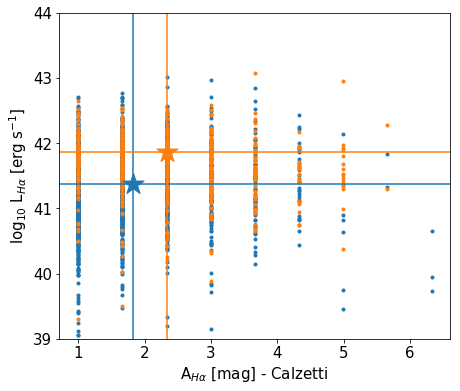

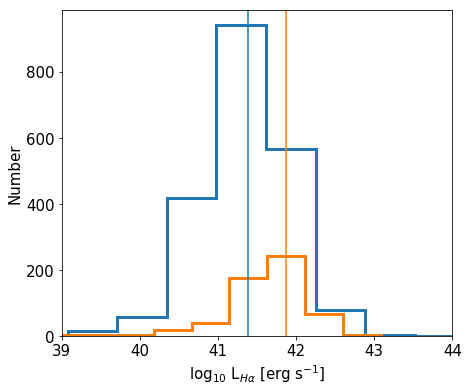

In [15]:
L_Ha_COSMOS_test  = flux_to_luminosity(flux=COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=COSMOS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_Ha_GOODSS_test  = flux_to_luminosity(flux=GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=GOODSS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

COSMOS_starburst_results_2 = COSMOS_starburst_results[COSMOS_starburst_results['best.attenuation.E_BV_lines']>0]
L_Ha_COSMOS_test_2         = L_Ha_COSMOS_test[(np.where(COSMOS_starburst_results['best.attenuation.E_BV_lines']>0))]
L_Ha_COSMOS_test_3 = L_Ha_COSMOS_test_2[L_Ha_COSMOS_test_2>0]

GOODSS_starburst_results_2 = GOODSS_starburst_results[GOODSS_starburst_results['best.attenuation.E_BV_lines']>0]
L_Ha_GOODSS_test_2         = L_Ha_GOODSS_test[(np.where(GOODSS_starburst_results['best.attenuation.E_BV_lines']>0))]
L_Ha_GOODSS_test_3 = L_Ha_GOODSS_test_2[L_Ha_GOODSS_test_2>0]

plt.figure(figsize=(7,6))
plt.scatter(Milky_Way_Ha*COSMOS_starburst_results_2['best.attenuation.E_BV_lines'], np.log10(L_Ha_COSMOS_test_2), s = 9)
plt.axvline(np.nanmean(Milky_Way_Ha*COSMOS_starburst_results_2['best.attenuation.E_BV_lines']), c = 'C0')
plt.axhline(np.nanmean(np.log10(L_Ha_COSMOS_test_2)), c = 'C0')
plt.scatter(Milky_Way_Ha*GOODSS_starburst_results_2['best.attenuation.E_BV_lines'], np.log10(L_Ha_GOODSS_test_2), s = 9)
plt.axvline(np.nanmean(Milky_Way_Ha*GOODSS_starburst_results_2['best.attenuation.E_BV_lines']), c = 'C1')
plt.axhline(np.log10(np.nanmean((L_Ha_GOODSS_test_3))), c = 'C1')
plt.scatter([np.nanmean(Milky_Way_Ha*GOODSS_starburst_results_2['best.attenuation.E_BV_lines'])], [np.log10(np.nanmean((L_Ha_GOODSS_test_3)))], s = 500, marker = '*', c = 'C1')
plt.scatter([np.nanmean(Milky_Way_Ha*COSMOS_starburst_results_2['best.attenuation.E_BV_lines'])], [np.nanmean(np.log10(L_Ha_COSMOS_test_2))], s = 500, marker = '*', c = 'C0')
plt.ylim(39, 44)
plt.xlabel(r'A$_{H\alpha}$ [mag] - Calzetti', fontsize = 15)
plt.ylabel(r'log$_{10}$ L$_{H\alpha}$ [erg s$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

L_Ha_COSMOS_test_2 = L_Ha_COSMOS_test_2[L_Ha_COSMOS_test_2>0]
L_Ha_GOODSS_test_2 = L_Ha_GOODSS_test_2[L_Ha_GOODSS_test_2>0]

plt.figure(figsize=(7,6))
plt.hist(np.log10(L_Ha_COSMOS_test_2), bins = 90, histtype = 'step', lw = 3)
plt.hist(np.log10(L_Ha_GOODSS_test_2), histtype = 'step', lw = 3)
plt.axvline(np.nanmean(np.log10(L_Ha_COSMOS_test_2)), c = 'C0')
plt.axvline(np.log10(np.nanmean((L_Ha_GOODSS_test_3))), c = 'C1')
plt.xlim(39, 44)
plt.ylabel(r'Number', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{H\alpha}$ [erg s$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

print('the difference is %.2f dex'%np.abs(np.nanmean(np.log10(L_Ha_COSMOS_test_3)-np.log10(np.nanmean((L_Ha_GOODSS_test_3))))))

/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
No handles with labels found to put in legend.


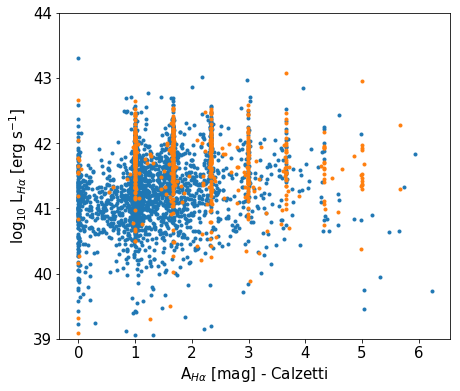

In [16]:
L_Ha_COSMOS_test  = flux_to_luminosity(flux=COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=COSMOS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_Ha_GOODSS_test  = flux_to_luminosity(flux=GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=GOODSS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

COSMOS_starburst_results_2 = COSMOS_starburst_results[COSMOS_starburst_results['bayes.attenuation.E_BV_lines']>0]
L_Ha_COSMOS_test_2         = L_Ha_COSMOS_test[(np.where(COSMOS_starburst_results['bayes.attenuation.E_BV_lines']>0))]
L_Ha_COSMOS_test_3 = L_Ha_COSMOS_test_2[L_Ha_COSMOS_test_2>0]

GOODSS_starburst_results_2 = GOODSS_starburst_results[GOODSS_starburst_results['bayes.attenuation.E_BV_lines']>0]
L_Ha_GOODSS_test_2         = L_Ha_GOODSS_test[(np.where(GOODSS_starburst_results['bayes.attenuation.E_BV_lines']>0))]
L_Ha_GOODSS_test_3 = L_Ha_GOODSS_test_2[L_Ha_GOODSS_test_2>0]
plt.figure(figsize=(7,6))
plt.scatter(Milky_Way_Ha*COSMOS_starburst_results_2['bayes.attenuation.E_BV_lines'], np.log10(L_Ha_COSMOS_test_2), s = 9)
# plt.axvline(np.nanmean(Milky_Way_Ha*COSMOS_starburst_results_2['bayes.attenuation.E_BV_lines']), c = 'C0')
# plt.axhline(np.nanmean(np.log10(L_Ha_COSMOS_test_2)), c = 'C0')
plt.scatter(Milky_Way_Ha*GOODSS_starburst_results_2['bayes.attenuation.E_BV_lines'], np.log10(L_Ha_GOODSS_test_2), s = 9)
# plt.axvline(np.nanmean(Milky_Way_Ha*GOODSS_starburst_results_2['bayes.attenuation.E_BV_lines']), c = 'C1')
# plt.axhline(np.log10(np.nanmean((L_Ha_GOODSS_test_3))), c = 'C1')
# plt.scatter([np.nanmean(Milky_Way_Ha*GOODSS_starburst_results_2['bayes.attenuation.E_BV_lines'])], [np.log10(np.nanmean((L_Ha_GOODSS_test_3)))], s = 500, marker = '*', c = 'C1')
# plt.scatter([np.nanmean(Milky_Way_Ha*COSMOS_starburst_results_2['bayes.attenuation.E_BV_lines'])], [np.nanmean(np.log10(L_Ha_COSMOS_test_2))], s = 500, marker = '*', c = 'C0')
plt.ylim(39, 44)
plt.xlabel(r'A$_{H\alpha}$ [mag] - Calzetti', fontsize = 15)
plt.ylabel(r'log$_{10}$ L$_{H\alpha}$ [erg s$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10
No handles with labels found to put in legend.
No handles with labels found to put in legend.


the difference is 0.24 dex


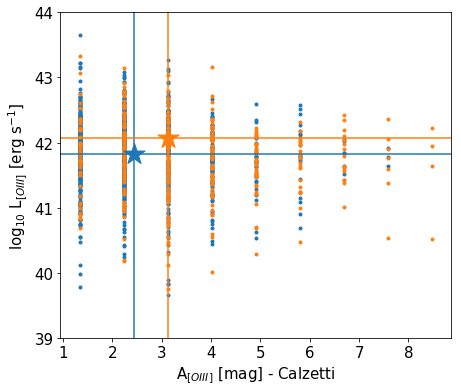

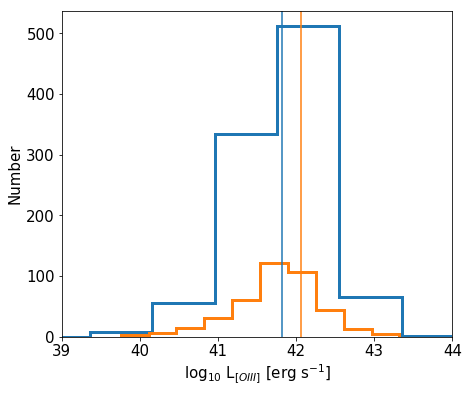

In [17]:
# COSMOS_sample = COSMOS_sample[(COSMOS_sample['line.OIII-500.7']>0)&\
#                              (COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3)]
# COSMOS_starburst_results_1 = COSMOS_starburst_results_1[np.where((COSMOS_sample['line.OIII-500.7']>0)&\
#                              (COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3))]

# GOODSS_sample = GOODSS_sample[(GOODSS_sample['line.OIII-500.7']>0)&\
#                              (GOODSS_sample['line.OIII-500.7']/GOODSS_sample['line.OIII-500.7_err']>3)]
# GOODSS_starburst_results_1 = GOODSS_starburst_results_1[np.where((GOODSS_sample['line.OIII-500.7']>0)&\
#                              (GOODSS_sample['line.OIII-500.7']/GOODSS_sample['line.OIII-500.7_err']>3))]

L_OIII_COSMOS_test  = flux_to_luminosity(flux=COSMOS_sample['line.OIII-500.7'], z=COSMOS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_OIII_GOODSS_test  = flux_to_luminosity(flux=GOODSS_sample['line.OIII-500.7'], z=GOODSS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

COSMOS_starburst_results_2 = COSMOS_starburst_results[COSMOS_starburst_results['best.attenuation.E_BV_lines']>0]
L_OIII_COSMOS_test_2         = L_OIII_COSMOS_test[(np.where(COSMOS_starburst_results['best.attenuation.E_BV_lines']>0))]
L_OIII_COSMOS_test_3 = L_OIII_COSMOS_test_2[L_OIII_COSMOS_test_2>0]

GOODSS_starburst_results_2 = GOODSS_starburst_results[GOODSS_starburst_results['best.attenuation.E_BV_lines']>0]
L_OIII_GOODSS_test_2         = L_OIII_GOODSS_test[(np.where(GOODSS_starburst_results['best.attenuation.E_BV_lines']>0))]
L_OIII_GOODSS_test_3 = L_OIII_GOODSS_test_2[L_OIII_GOODSS_test_2>0]

plt.figure(figsize=(7,6))
plt.scatter(Milky_Way_OIII*COSMOS_starburst_results_2['best.attenuation.E_BV_lines'], np.log10(L_OIII_COSMOS_test_2), s = 9)
plt.axvline(np.nanmean(Milky_Way_OIII*COSMOS_starburst_results_2['best.attenuation.E_BV_lines']), c = 'C0')
plt.axhline(np.nanmean(np.log10(L_OIII_COSMOS_test_3)), c = 'C0')
plt.scatter(Milky_Way_OIII*GOODSS_starburst_results_2['best.attenuation.E_BV_lines'], np.log10(L_OIII_GOODSS_test_2), s = 9)
plt.axvline(np.nanmean(Milky_Way_OIII*GOODSS_starburst_results_2['best.attenuation.E_BV_lines']), c = 'C1')
plt.axhline(np.log10(np.nanmean((L_OIII_GOODSS_test_3))), c = 'C1')
plt.scatter([np.nanmean(Milky_Way_OIII*GOODSS_starburst_results_2['best.attenuation.E_BV_lines'])], [np.log10(np.nanmean((L_OIII_GOODSS_test_3)))], s = 500, marker = '*', c = 'C1')
plt.scatter([np.nanmean(Milky_Way_OIII*COSMOS_starburst_results_2['best.attenuation.E_BV_lines'])], [np.nanmean(np.log10(L_OIII_COSMOS_test_3))], s = 500, marker = '*', c = 'C0')
plt.ylim(39, 44)
plt.xlabel(r'A$_{[OIII]}$ [mag] - Calzetti', fontsize = 15)
plt.ylabel(r'log$_{10}$ L$_{[OIII]}$ [erg s$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

L_OIII_COSMOS_test_2 = L_OIII_COSMOS_test_2[L_OIII_COSMOS_test_2>0]
L_OIII_GOODSS_test_2 = L_OIII_GOODSS_test_2[L_OIII_GOODSS_test_2>0]

plt.figure(figsize=(7,6))
plt.hist(np.log10(L_OIII_COSMOS_test_2), histtype = 'step', lw = 3)
plt.hist(np.log10(L_OIII_GOODSS_test_2), histtype = 'step', lw = 3)
plt.axvline(np.nanmean(np.log10(L_OIII_COSMOS_test_2)), c = 'C0')
plt.axvline(np.log10(np.nanmean((L_OIII_GOODSS_test_3))), c = 'C1')
plt.xlim(39, 44)
plt.ylabel(r'Number', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{[OIII]}$ [erg s$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

print('the difference is %.2f dex'%np.abs(np.nanmean(np.log10(L_OIII_COSMOS_test_2)-np.log10(np.nanmean((L_OIII_GOODSS_test_3))))))

/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log10
No handles with labels found to put in legend.
No handles with labels found to put in legend.


the difference is 0.51 dex


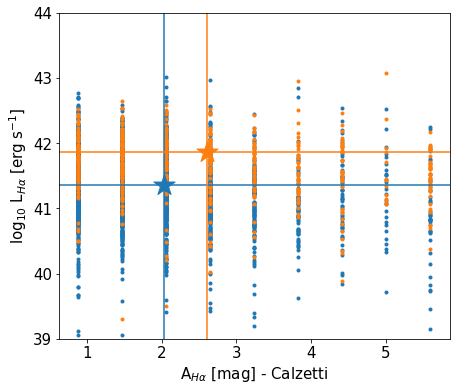

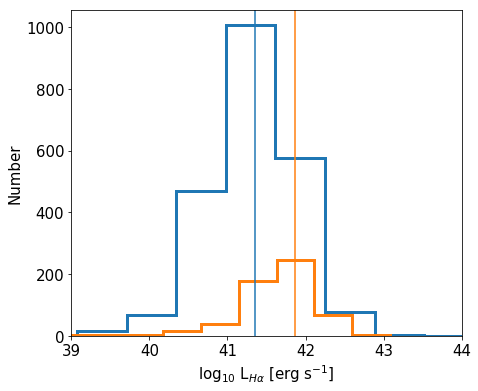

In [18]:
# COSMOS_sample = COSMOS_sample[(COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']>0)&\
#                              (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)]
# COSMOS_CF00_results_1 = COSMOS_CF00_results[np.where((COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']>0)&\
#                              (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3))]

# GOODSS_sample = GOODSS_sample[(GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']>0)&\
#                              (GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)]
# GOODSS_CF00_results_1 = GOODSS_CF00_results[np.where((GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']>0)&\
#                              (GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3))]

L_Ha_COSMOS_test  = flux_to_luminosity(flux=COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=COSMOS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_Ha_GOODSS_test  = flux_to_luminosity(flux=GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=GOODSS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

COSMOS_CF00_results_2 = COSMOS_CF00_results[COSMOS_CF00_results['best.attenuation.Av_BC']>0]
L_Ha_COSMOS_test_2         = L_Ha_COSMOS_test[(np.where(COSMOS_CF00_results['best.attenuation.Av_BC']>0))]
L_Ha_COSMOS_test_3 = L_Ha_COSMOS_test_2[L_Ha_COSMOS_test_2>0]

A_BC_COSMOS_CF00_1   = A_line(A_v = COSMOS_CF00_results_2['best.attenuation.Av_BC'], Lambda = 0.65628, Lambda_v = 0.55,\
                            n = COSMOS_CF00_results_2['best.attenuation.slope_BC'])
A_ISM_COSMOS_CF00_1  = A_line(A_v = COSMOS_CF00_results_2['best.attenuation.Av_ISM'], Lambda = 0.65628, Lambda_v = 0.55,\
                                n = COSMOS_CF00_results_2['best.attenuation.slope_ISM'])
A_COSMOS_CF00_1 = A_BC_COSMOS_CF00_1 + A_ISM_COSMOS_CF00_1

GOODSS_CF00_results_2 = GOODSS_CF00_results[GOODSS_CF00_results['best.attenuation.Av_BC']>0]
L_Ha_GOODSS_test_2         = L_Ha_GOODSS_test[(np.where(GOODSS_CF00_results['best.attenuation.Av_BC']>0))]
L_Ha_GOODSS_test_3 = L_Ha_GOODSS_test_2[L_Ha_GOODSS_test_2>0]

A_BC_GOODSS_CF00_1   = A_line(A_v = GOODSS_CF00_results_2['best.attenuation.Av_BC'], Lambda = 0.65628, Lambda_v = 0.55,\
                            n = GOODSS_CF00_results_2['best.attenuation.slope_BC'])
A_ISM_GOODSS_CF00_1  = A_line(A_v = GOODSS_CF00_results_2['best.attenuation.Av_ISM'], Lambda = 0.65628, Lambda_v = 0.55,\
                                n = GOODSS_CF00_results_2['best.attenuation.slope_ISM'])
A_GOODSS_CF00_1 = A_BC_GOODSS_CF00_1 + A_ISM_GOODSS_CF00_1


plt.figure(figsize=(7,6))
plt.scatter(A_COSMOS_CF00_1, np.log10(L_Ha_COSMOS_test_2), s = 9)
plt.axvline(np.nanmean(A_COSMOS_CF00_1), c = 'C0')
plt.axhline(np.nanmean(np.log10(L_Ha_COSMOS_test_3)), c = 'C0')
plt.scatter(A_GOODSS_CF00_1, np.log10(L_Ha_GOODSS_test_2), s = 9)
plt.axvline(np.nanmean(A_GOODSS_CF00_1), c = 'C1')
plt.axhline(np.log10(np.nanmean((L_Ha_GOODSS_test_3))), c = 'C1')
plt.scatter([np.nanmean(A_GOODSS_CF00_1)], [np.log10(np.nanmean((L_Ha_GOODSS_test_3)))], s = 500, marker = '*', c = 'C1')
plt.scatter([np.nanmean(A_COSMOS_CF00_1)], [np.nanmean(np.log10(L_Ha_COSMOS_test_3))], s = 500, marker = '*', c = 'C0')
plt.ylim(39, 44)
plt.xlabel(r'A$_{H\alpha}$ [mag] - Calzetti', fontsize = 15)
plt.ylabel(r'log$_{10}$ L$_{H\alpha}$ [erg s$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

L_Ha_COSMOS_test_2 = L_Ha_COSMOS_test_2[L_Ha_COSMOS_test_2>0]
L_Ha_GOODSS_test_2 = L_Ha_GOODSS_test_2[L_Ha_GOODSS_test_2>0]

plt.figure(figsize=(7,6))
plt.hist(np.log10(L_Ha_COSMOS_test_2), bins = 90, histtype = 'step', lw = 3)
plt.hist(np.log10(L_Ha_GOODSS_test_2), histtype = 'step', lw = 3)
plt.axvline(np.nanmean(np.log10(L_Ha_COSMOS_test_2)), c = 'C0')
plt.axvline(np.log10(np.nanmean((L_Ha_GOODSS_test_3))), c = 'C1')
plt.xlim(39, 44)
plt.ylabel(r'Number', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{H\alpha}$ [erg s$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

print('the difference is %.2f dex'%np.abs(np.nanmean(np.log10(L_Ha_COSMOS_test_3)-np.log10(np.nanmean((L_Ha_GOODSS_test_3))))))

/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10
No handles with labels found to put in legend.
No handles with labels found to put in legend.


the difference is 0.25 dex


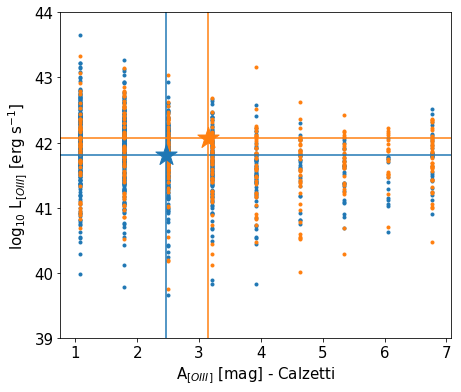

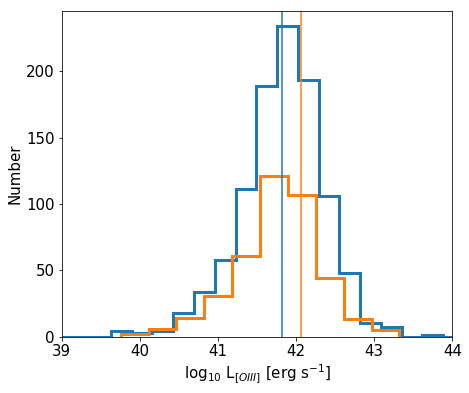

In [19]:
L_OIII_COSMOS_test  = flux_to_luminosity(flux=COSMOS_sample['line.OIII-500.7'], z=COSMOS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_OIII_GOODSS_test  = flux_to_luminosity(flux=GOODSS_sample['line.OIII-500.7'], z=GOODSS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

COSMOS_CF00_results_2 = COSMOS_CF00_results[COSMOS_CF00_results['best.attenuation.Av_BC']>0]
L_OIII_COSMOS_test_2         = L_OIII_COSMOS_test[(np.where(COSMOS_CF00_results['best.attenuation.Av_BC']>0))]
L_OIII_COSMOS_test_3 = L_OIII_COSMOS_test_2[L_OIII_COSMOS_test_2>0]

A_BC_COSMOS_CF00_1   = A_line(A_v = COSMOS_CF00_results_2['best.attenuation.Av_BC'], Lambda = 0.5007, Lambda_v = 0.55,\
                            n = COSMOS_CF00_results_2['best.attenuation.slope_BC'])
A_ISM_COSMOS_CF00_1  = A_line(A_v = COSMOS_CF00_results_2['best.attenuation.Av_ISM'], Lambda = 0.5007, Lambda_v = 0.55,\
                                n = COSMOS_CF00_results_2['best.attenuation.slope_ISM'])
A_COSMOS_CF00_1 = A_BC_COSMOS_CF00_1 + A_ISM_COSMOS_CF00_1

GOODSS_CF00_results_2 = GOODSS_CF00_results[GOODSS_CF00_results['best.attenuation.Av_BC']>0]
L_OIII_GOODSS_test_2         = L_OIII_GOODSS_test[(np.where(GOODSS_CF00_results['best.attenuation.Av_BC']>0))]
L_OIII_GOODSS_test_3 = L_OIII_GOODSS_test_2[L_OIII_GOODSS_test_2>0]

A_BC_GOODSS_CF00_1   = A_line(A_v = GOODSS_CF00_results_2['best.attenuation.Av_BC'], Lambda = 0.5007, Lambda_v = 0.55,\
                            n = GOODSS_CF00_results_2['best.attenuation.slope_BC'])
A_ISM_GOODSS_CF00_1  = A_line(A_v = GOODSS_CF00_results_2['best.attenuation.Av_ISM'], Lambda = 0.5007, Lambda_v = 0.55,\
                                n = GOODSS_CF00_results_2['best.attenuation.slope_ISM'])
A_GOODSS_CF00_1 = A_BC_GOODSS_CF00_1 + A_ISM_GOODSS_CF00_1


plt.figure(figsize=(7,6))
plt.scatter(A_COSMOS_CF00_1, np.log10(L_OIII_COSMOS_test_2), s = 9)
plt.axvline(np.nanmean(A_COSMOS_CF00_1), c = 'C0')
plt.axhline(np.nanmean(np.log10(L_OIII_COSMOS_test_3)), c = 'C0')
plt.scatter(A_GOODSS_CF00_1, np.log10(L_OIII_GOODSS_test_2), s = 9)
plt.axvline(np.nanmean(A_GOODSS_CF00_1), c = 'C1')
plt.axhline(np.log10(np.nanmean((L_OIII_GOODSS_test_3))), c = 'C1')
plt.scatter([np.nanmean(A_GOODSS_CF00_1)], [np.log10(np.nanmean((L_OIII_GOODSS_test_3)))], s = 500, marker = '*', c = 'C1')
plt.scatter([np.nanmean(A_COSMOS_CF00_1)], [np.nanmean(np.log10(L_OIII_COSMOS_test_3))], s = 500, marker = '*', c = 'C0')
plt.ylim(39, 44)
plt.xlabel(r'A$_{[OIII]}$ [mag] - Calzetti', fontsize = 15)
plt.ylabel(r'log$_{10}$ L$_{[OIII]}$ [erg s$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

L_OIII_COSMOS_test_2 = L_OIII_COSMOS_test_2[L_OIII_COSMOS_test_2>0]
L_OIII_GOODSS_test_2 = L_OIII_GOODSS_test_2[L_OIII_GOODSS_test_2>0]

plt.figure(figsize=(7,6))
plt.hist(np.log10(L_OIII_COSMOS_test_2), bins = 30, histtype = 'step', lw = 3)
plt.hist(np.log10(L_OIII_GOODSS_test_2), histtype = 'step', lw = 3)
plt.axvline(np.nanmean(np.log10(L_OIII_COSMOS_test_2)), c = 'C0')
plt.axvline(np.log10(np.nanmean((L_OIII_GOODSS_test_3))), c = 'C1')
plt.xlim(39, 44)
plt.ylabel(r'Number', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{[OIII]}$ [erg s$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

print('the difference is %.2f dex'%np.abs(np.nanmean(np.log10(L_OIII_COSMOS_test_3)-np.log10(np.nanmean((L_OIII_GOODSS_test_3))))))

/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


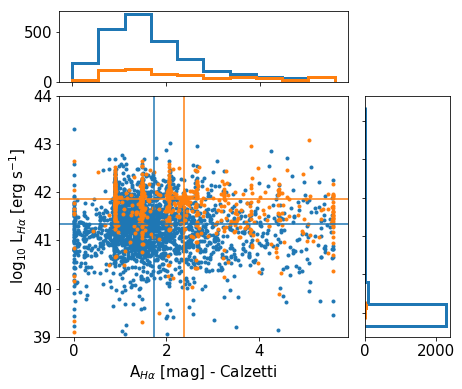

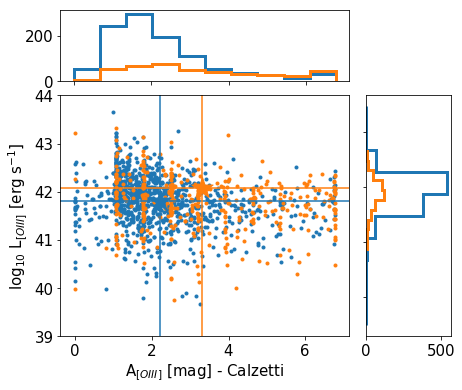

In [20]:
L_Ha_COSMOS_test  = flux_to_luminosity(flux=COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=COSMOS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_Ha_GOODSS_test  = flux_to_luminosity(flux=GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=GOODSS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

COSMOS_CF00_results_2 = COSMOS_CF00_results[COSMOS_CF00_results['bayes.attenuation.Av_BC']>0]
L_Ha_COSMOS_test_2         = L_Ha_COSMOS_test[(np.where(COSMOS_CF00_results['bayes.attenuation.Av_BC']>0))]
L_Ha_COSMOS_test_3 = L_Ha_COSMOS_test_2[L_Ha_COSMOS_test_2>0]
COSMOS_CF00_results_3 = COSMOS_CF00_results_2[np.where(L_Ha_COSMOS_test_2>0)]

A_BC_COSMOS_CF00_1   = A_line(A_v = COSMOS_CF00_results_3['bayes.attenuation.Av_BC'], Lambda = 0.65628, Lambda_v = 0.55,\
                            n = COSMOS_CF00_results_3['bayes.attenuation.slope_BC'])
A_ISM_COSMOS_CF00_1  = A_line(A_v = COSMOS_CF00_results_3['bayes.attenuation.Av_ISM'], Lambda = 0.65628, Lambda_v = 0.55,\
                                n = COSMOS_CF00_results_3['bayes.attenuation.slope_ISM'])
A_COSMOS_CF00_1 = A_BC_COSMOS_CF00_1 + A_ISM_COSMOS_CF00_1

GOODSS_CF00_results_2 = GOODSS_CF00_results[GOODSS_CF00_results['bayes.attenuation.Av_BC']>0]
L_Ha_GOODSS_test_2         = L_Ha_GOODSS_test[(np.where(GOODSS_CF00_results['bayes.attenuation.Av_BC']>0))]
L_Ha_GOODSS_test_3 = L_Ha_GOODSS_test_2[L_Ha_GOODSS_test_2>0]
GOODSS_CF00_results_3 = GOODSS_CF00_results_2[np.where(L_Ha_GOODSS_test_2>0)]

A_BC_GOODSS_CF00_1   = A_line(A_v = GOODSS_CF00_results_3['bayes.attenuation.Av_BC'], Lambda = 0.65628, Lambda_v = 0.55,\
                            n = GOODSS_CF00_results_3['bayes.attenuation.slope_BC'])
A_ISM_GOODSS_CF00_1  = A_line(A_v = GOODSS_CF00_results_3['bayes.attenuation.Av_ISM'], Lambda = 0.65628, Lambda_v = 0.55,\
                                n = GOODSS_CF00_results_3['bayes.attenuation.slope_ISM'])
A_GOODSS_CF00_1 = A_BC_GOODSS_CF00_1 + A_ISM_GOODSS_CF00_1


x   = A_COSMOS_CF00_1
y   = np.log10(L_Ha_COSMOS_test_3)
x_1 = A_GOODSS_CF00_1
y_1 = np.log10(L_Ha_GOODSS_test_3)

fig = plt.figure(figsize=(7,6))

gs = GridSpec(4,4)

ax_joint  = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(x,y, s = 9)
ax_marg_x.hist(x, histtype = 'step', lw = 3)
ax_marg_y.hist(y,orientation="horizontal", histtype = 'step', lw = 3)
ax_joint.scatter(x_1,y_1, s = 9)
ax_marg_x.hist(x_1, histtype = 'step', lw = 3)
ax_marg_y.hist(y_1, bins = 90, orientation="horizontal", histtype = 'step', lw = 3)

ax_joint.axvline(np.nanmean(A_COSMOS_CF00_1), c = 'C0')
ax_joint.axhline(np.nanmean(np.log10(L_Ha_COSMOS_test_3)), c = 'C0')
ax_joint.axvline(np.nanmean(A_GOODSS_CF00_1), c = 'C1')
ax_joint.axhline(np.log10(np.nanmean((L_Ha_GOODSS_test_3))), c = 'C1')
ax_joint.scatter([np.nanmean(A_GOODSS_CF00_1)], [np.log10(np.nanmean((L_Ha_GOODSS_test_3)))], s = 500, marker = '*', c = 'C1')
ax_joint.scatter([np.nanmean(A_COSMOS_CF00_1)], [np.nanmean(np.log10(L_Ha_COSMOS_test_3))], s = 500, marker = '*', c = 'C0')
ax_joint.set_ylim(39, 44)

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel(r'A$_{H\alpha}$ [mag] - Calzetti', fontsize = 15)
ax_joint.set_ylabel(r'log$_{10}$ L$_{H\alpha}$ [erg s$^{-1}$]', fontsize = 15)
ax_joint.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax_marg_x.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax_marg_y.tick_params(axis = 'both', which = 'major', labelsize = 15)

# Set labels on marginals
# ax_marg_y.set_xlabel('Marginal x label')
# ax_marg_x.set_ylabel('Marginal y label')
plt.show()

# ============================================================================================================

L_OIII_COSMOS_test  = flux_to_luminosity(flux=COSMOS_sample['line.OIII-500.7'], z=COSMOS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_OIII_GOODSS_test  = flux_to_luminosity(flux=GOODSS_sample['line.OIII-500.7'], z=GOODSS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

COSMOS_CF00_results_2 = COSMOS_CF00_results[COSMOS_CF00_results['bayes.attenuation.Av_BC']>0]
L_OIII_COSMOS_test_2         = L_OIII_COSMOS_test[(np.where(COSMOS_CF00_results['bayes.attenuation.Av_BC']>0))]
L_OIII_COSMOS_test_3 = L_OIII_COSMOS_test_2[L_OIII_COSMOS_test_2>0]
COSMOS_CF00_results_3 = COSMOS_CF00_results_2[np.where(L_OIII_COSMOS_test_2>0)]

A_BC_COSMOS_CF00_1   = A_line(A_v = COSMOS_CF00_results_3['bayes.attenuation.Av_BC'], Lambda = 0.5007, Lambda_v = 0.55,\
                            n = COSMOS_CF00_results_3['bayes.attenuation.slope_BC'])
A_ISM_COSMOS_CF00_1  = A_line(A_v = COSMOS_CF00_results_3['bayes.attenuation.Av_ISM'], Lambda = 0.5007, Lambda_v = 0.55,\
                                n = COSMOS_CF00_results_3['bayes.attenuation.slope_ISM'])
A_COSMOS_CF00_1 = A_BC_COSMOS_CF00_1 + A_ISM_COSMOS_CF00_1

GOODSS_CF00_results_2 = GOODSS_CF00_results[GOODSS_CF00_results['bayes.attenuation.Av_BC']>0]
L_OIII_GOODSS_test_2         = L_OIII_GOODSS_test[(np.where(GOODSS_CF00_results['bayes.attenuation.Av_BC']>0))]
L_OIII_GOODSS_test_3 = L_OIII_GOODSS_test_2[L_OIII_GOODSS_test_2>0]
GOODSS_CF00_results_3 = GOODSS_CF00_results_2[np.where(L_OIII_GOODSS_test_2>0)]

A_BC_GOODSS_CF00_1   = A_line(A_v = GOODSS_CF00_results_3['bayes.attenuation.Av_BC'], Lambda = 0.5007, Lambda_v = 0.55,\
                            n = GOODSS_CF00_results_3['bayes.attenuation.slope_BC'])
A_ISM_GOODSS_CF00_1  = A_line(A_v = GOODSS_CF00_results_3['bayes.attenuation.Av_ISM'], Lambda = 0.5007, Lambda_v = 0.55,\
                                n = GOODSS_CF00_results_3['bayes.attenuation.slope_ISM'])
A_GOODSS_CF00_1 = A_BC_GOODSS_CF00_1 + A_ISM_GOODSS_CF00_1

x   = A_COSMOS_CF00_1
y   = np.log10(L_OIII_COSMOS_test_3)
x_1 = A_GOODSS_CF00_1
y_1 = np.log10(L_OIII_GOODSS_test_3)

fig = plt.figure(figsize=(7,6))

gs = GridSpec(4,4)

ax_joint  = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(x,y, s = 9)
ax_marg_x.hist(x, histtype = 'step', lw = 3)
ax_marg_y.hist(y,orientation="horizontal", histtype = 'step', lw = 3)
ax_joint.scatter(x_1,y_1, s = 9)
ax_marg_x.hist(x_1, histtype = 'step', lw = 3)
ax_marg_y.hist(y_1,orientation="horizontal", histtype = 'step', lw = 3)

ax_joint.axvline(np.nanmean(A_COSMOS_CF00_1), c = 'C0')
ax_joint.axhline(np.nanmean(np.log10(L_OIII_COSMOS_test_3)), c = 'C0')
ax_joint.axvline(np.nanmean(A_GOODSS_CF00_1), c = 'C1')
ax_joint.axhline(np.log10(np.nanmean((L_OIII_GOODSS_test_3))), c = 'C1')
ax_joint.scatter([np.nanmean(A_GOODSS_CF00_1)], [np.log10(np.nanmean((L_OIII_GOODSS_test_3)))], s = 500, marker = '*', c = 'C1')
ax_joint.scatter([np.nanmean(A_COSMOS_CF00_1)], [np.nanmean(np.log10(L_OIII_COSMOS_test_3))], s = 500, marker = '*', c = 'C0')
ax_joint.set_ylim(39, 44)

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel(r'A$_{[OIII]}$ [mag] - Calzetti', fontsize = 15)
ax_joint.set_ylabel(r'log$_{10}$ L$_{[OIII]}$ [erg s$^{-1}$]', fontsize = 15)
ax_joint.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax_marg_x.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax_marg_y.tick_params(axis = 'both', which = 'major', labelsize = 15)

# Set labels on marginals
# ax_marg_y.set_xlabel('Marginal x label')
# ax_marg_x.set_ylabel('Marginal y label')
plt.show()

# Differences with physical parameters

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
No handles with labels found to put in legend.
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
No handles with labels found to put in legend.
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value e

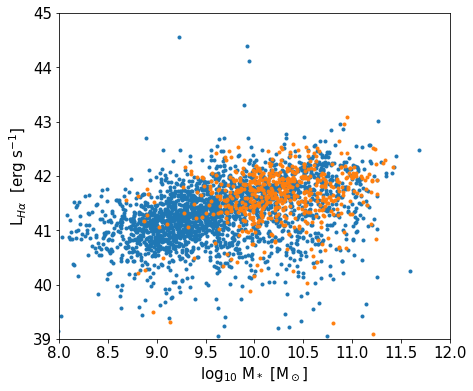

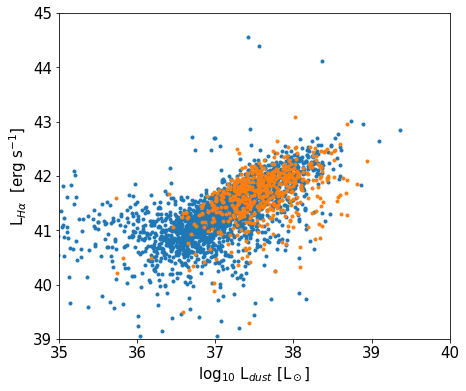

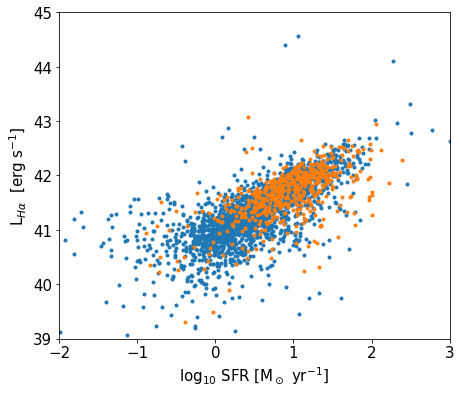

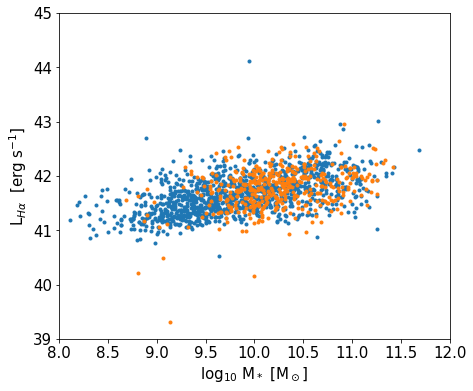

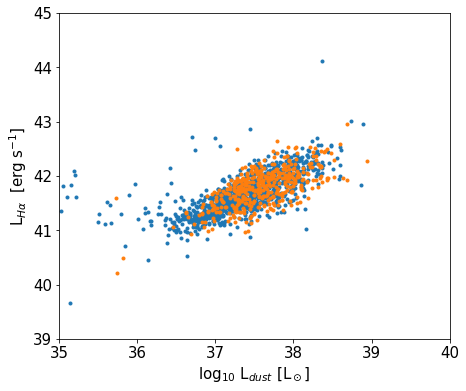

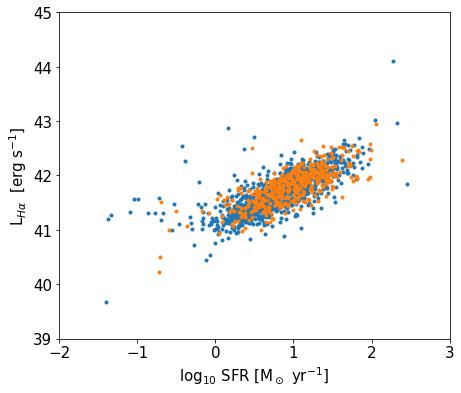

In [67]:
L_Ha_COSMOS_test_0  = flux_to_luminosity(flux=COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=COSMOS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_Ha_GOODSS_test_0  = flux_to_luminosity(flux=GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=GOODSS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

# plt.figure(figsize=(7,6))
# plt.scatter(np.log10(), np.log10(COSMOS_sample['line.OIII-500.7']), s = 9)
# plt.scatter(np.log10(n),np.log10(GOODSS_sample['line.OIII-500.7']), s = 9)
# plt.xlim(-22, -16)
# plt.ylim(-22, -16)
# plt.xlabel(r'H$\alpha$ flux', fontsize = 15)
# plt.ylabel(r'[OIII] flux', fontsize = 15)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')


plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results['bayes.stellar.m_star']), np.log10(L_Ha_COSMOS_test_0), s = 9)
plt.scatter(np.log10(GOODSS_starburst_results['bayes.stellar.m_star']), np.log10(L_Ha_GOODSS_test_0), s = 9)
plt.xlim(8, 12)
plt.ylim(39, 45)
plt.ylabel(r'L$_{H\alpha}$  [erg s$^{-1}$]', fontsize = 15)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results['bayes.dust.luminosity']), np.log10(L_Ha_COSMOS_test_0), s = 9)
plt.scatter(np.log10(GOODSS_starburst_results['bayes.dust.luminosity']), np.log10(L_Ha_GOODSS_test_0), s = 9)
plt.xlim(35, 40)
plt.ylim(39, 45)
plt.ylabel(r'L$_{H\alpha}$  [erg s$^{-1}$]', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{dust}$ [L$_\odot$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results['best.sfh.sfr']), np.log10(L_Ha_COSMOS_test_0), s = 9)
plt.scatter(np.log10(GOODSS_starburst_results['best.sfh.sfr']), np.log10(L_Ha_GOODSS_test_0), s = 9)
plt.xlim(-2, 3)
plt.ylim(39, 45)
plt.ylabel(r'L$_{H\alpha}$  [erg s$^{-1}$]', fontsize = 15)
plt.xlabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')


COSMOS_sample_1 = COSMOS_sample[COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3]
COSMOS_starburst_results_1 = COSMOS_starburst_results[np.where(COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)]

GOODSS_sample_1 = GOODSS_sample[GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3]
GOODSS_starburst_results_1 = GOODSS_starburst_results[np.where(GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)]

L_Ha_COSMOS_test  = flux_to_luminosity(flux=COSMOS_sample_1['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=COSMOS_sample_1['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_Ha_GOODSS_test  = flux_to_luminosity(flux=GOODSS_sample_1['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=GOODSS_sample_1['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)


plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results_1['bayes.stellar.m_star']), np.log10(L_Ha_COSMOS_test), s = 9)
plt.scatter(np.log10(GOODSS_starburst_results_1['bayes.stellar.m_star']), np.log10(L_Ha_GOODSS_test), s = 9)
plt.xlim(8, 12)
plt.ylim(39, 45)
plt.ylabel(r'L$_{H\alpha}$  [erg s$^{-1}$]', fontsize = 15)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results_1['bayes.dust.luminosity']), np.log10(L_Ha_COSMOS_test), s = 9)
plt.scatter(np.log10(GOODSS_starburst_results_1['bayes.dust.luminosity']), np.log10(L_Ha_GOODSS_test), s = 9)
plt.xlim(35, 40)
plt.ylim(39, 45)
plt.ylabel(r'L$_{H\alpha}$  [erg s$^{-1}$]', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{dust}$ [L$_\odot$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results_1['best.sfh.sfr']), np.log10(L_Ha_COSMOS_test), s = 9)
plt.scatter(np.log10(GOODSS_starburst_results_1['best.sfh.sfr']), np.log10(L_Ha_GOODSS_test), s = 9)
plt.xlim(-2, 3)
plt.ylim(39, 45)
plt.ylabel(r'L$_{H\alpha}$  [erg s$^{-1}$]', fontsize = 15)
plt.xlabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
No handles with labels found to put in legend.
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log1

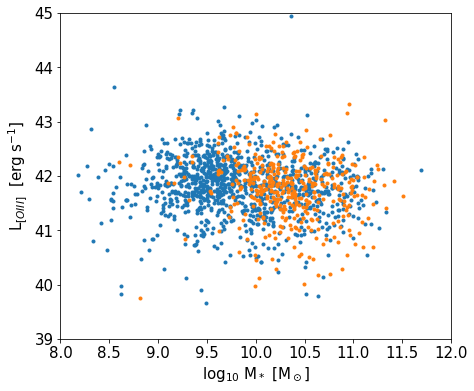

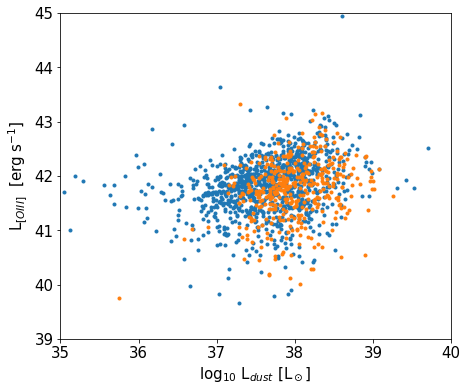

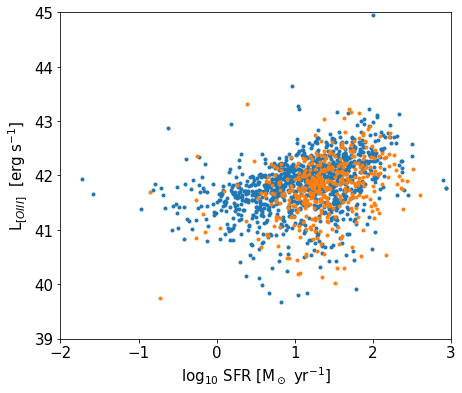

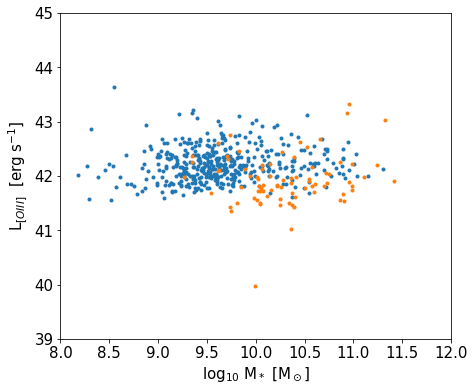

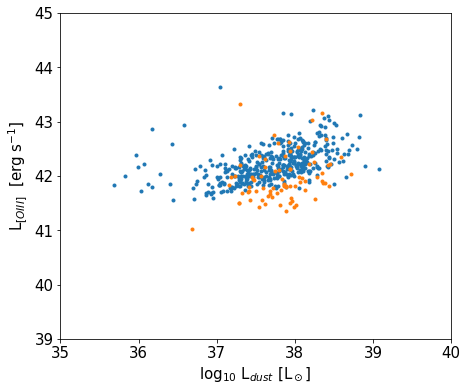

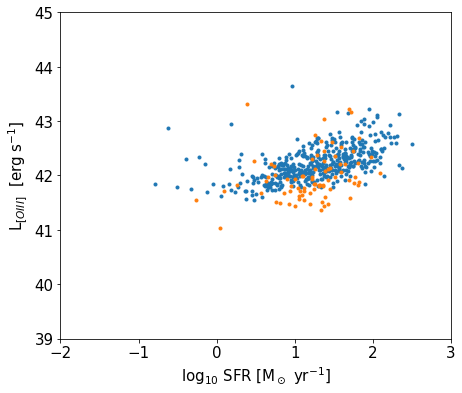

In [68]:
L_OIII_COSMOS_test_0  = flux_to_luminosity(flux=COSMOS_sample['line.OIII-500.7'], z=COSMOS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_OIII_GOODSS_test_0  = flux_to_luminosity(flux=GOODSS_sample['line.OIII-500.7'], z=GOODSS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

# plt.figure(figsize=(7,6))
# plt.scatter(np.log10(), np.log10(COSMOS_sample['line.OIII-500.7']), s = 9)
# plt.scatter(np.log10(n),np.log10(GOODSS_sample['line.OIII-500.7']), s = 9)
# plt.xlim(-22, -16)
# plt.ylim(-22, -16)
# plt.xlabel(r'H$\alpha$ flux', fontsize = 15)
# plt.ylabel(r'[OIII] flux', fontsize = 15)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')


plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results['bayes.stellar.m_star']), np.log10(L_OIII_COSMOS_test_0), s = 9)
plt.scatter(np.log10(GOODSS_starburst_results['bayes.stellar.m_star']), np.log10(L_OIII_GOODSS_test_0), s = 9)
plt.xlim(8, 12)
plt.ylim(39, 45)
plt.ylabel(r'L$_{[OIII]}$  [erg s$^{-1}$]', fontsize = 15)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results['bayes.dust.luminosity']), np.log10(L_OIII_COSMOS_test_0), s = 9)
plt.scatter(np.log10(GOODSS_starburst_results['bayes.dust.luminosity']), np.log10(L_OIII_GOODSS_test_0), s = 9)
plt.xlim(35, 40)
plt.ylim(39, 45)
plt.ylabel(r'L$_{[OIII]}$  [erg s$^{-1}$]', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{dust}$ [L$_\odot$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results['best.sfh.sfr']), np.log10(L_OIII_COSMOS_test_0), s = 9)
plt.scatter(np.log10(GOODSS_starburst_results['best.sfh.sfr']), np.log10(L_OIII_GOODSS_test_0), s = 9)
plt.xlim(-2, 3)
plt.ylim(39, 45)
plt.ylabel(r'L$_{[OIII]}$  [erg s$^{-1}$]', fontsize = 15)
plt.xlabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')


COSMOS_sample_1 = COSMOS_sample[COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3]
COSMOS_starburst_results_1 = COSMOS_starburst_results[np.where(COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3)]

GOODSS_sample_1 = GOODSS_sample[GOODSS_sample['line.OIII-500.7']/GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3]
GOODSS_starburst_results_1 = GOODSS_starburst_results[np.where(GOODSS_sample['line.OIII-500.7']/GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)]

L_OIII_COSMOS_test  = flux_to_luminosity(flux=COSMOS_sample_1['line.OIII-500.7'], z=COSMOS_sample_1['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_OIII_GOODSS_test  = flux_to_luminosity(flux=GOODSS_sample_1['line.OIII-500.7'], z=GOODSS_sample_1['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)


plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results_1['bayes.stellar.m_star']), np.log10(L_OIII_COSMOS_test), s = 9)
plt.scatter(np.log10(GOODSS_starburst_results_1['bayes.stellar.m_star']), np.log10(L_OIII_GOODSS_test), s = 9)
plt.xlim(8, 12)
plt.ylim(39, 45)
plt.ylabel(r'L$_{[OIII]}$  [erg s$^{-1}$]', fontsize = 15)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results_1['bayes.dust.luminosity']), np.log10(L_OIII_COSMOS_test), s = 9)
plt.scatter(np.log10(GOODSS_starburst_results_1['bayes.dust.luminosity']), np.log10(L_OIII_GOODSS_test), s = 9)
plt.xlim(35, 40)
plt.ylim(39, 45)
plt.ylabel(r'L$_{[OIII]}$  [erg s$^{-1}$]', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{dust}$ [L$_\odot$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results_1['best.sfh.sfr']), np.log10(L_OIII_COSMOS_test), s = 9)
plt.scatter(np.log10(GOODSS_starburst_results_1['best.sfh.sfr']), np.log10(L_OIII_GOODSS_test), s = 9)
plt.xlim(-2, 3)
plt.ylim(39, 45)
plt.ylabel(r'L$_{[OIII]}$  [erg s$^{-1}$]', fontsize = 15)
plt.xlabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


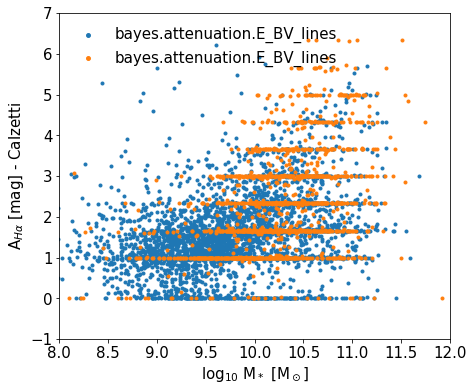

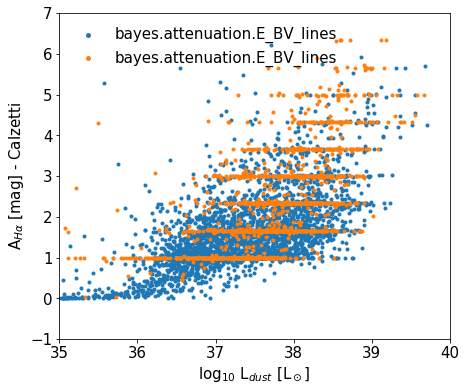

In [27]:
L_Ha_COSMOS_test  = flux_to_luminosity(flux=COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=COSMOS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_Ha_GOODSS_test  = flux_to_luminosity(flux=GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/NII_correction, z=GOODSS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results['bayes.stellar.m_star']), Milky_Way_Ha*COSMOS_starburst_results['bayes.attenuation.E_BV_lines'], s = 9)
plt.scatter(np.log10(GOODSS_starburst_results['bayes.stellar.m_star']), Milky_Way_Ha*GOODSS_starburst_results['bayes.attenuation.E_BV_lines'], s = 9)
plt.xlim(8, 12)
plt.ylim(-1, 7)
plt.ylabel(r'A$_{H\alpha}$ [mag] - Calzetti', fontsize = 15)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_starburst_results['bayes.dust.luminosity']), Milky_Way_Ha*COSMOS_starburst_results['bayes.attenuation.E_BV_lines'], s = 9)
plt.scatter(np.log10(GOODSS_starburst_results['bayes.dust.luminosity']), Milky_Way_Ha*GOODSS_starburst_results['bayes.attenuation.E_BV_lines'], s = 9)
plt.xlim(35, 40)
plt.ylim(-1, 7)
plt.ylabel(r'A$_{H\alpha}$ [mag] - Calzetti', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{dust}$ [L$_\odot$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

# Differences between COSMOS and GOODS-S

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
No handles with labels found to put in legend.
No handles with labels found to put in legend.


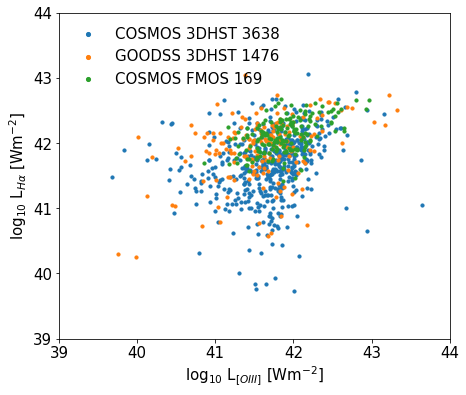

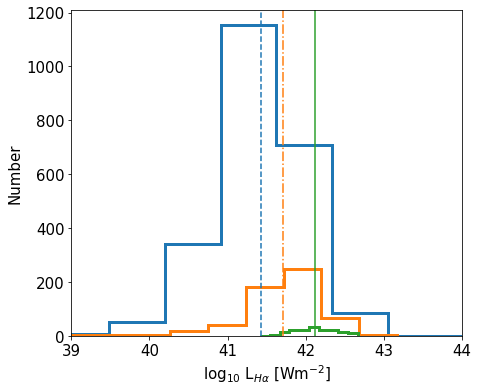

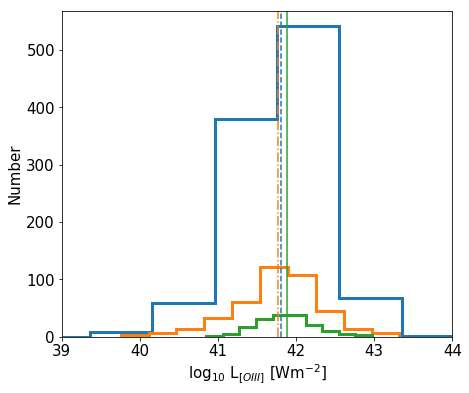

In [17]:
L_Ha_COSMOS  = flux_to_luminosity(flux=COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4'], z=COSMOS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_Ha_GOODSS  = flux_to_luminosity(flux=GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4'], z=GOODSS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

L_OIII_COSMOS  = flux_to_luminosity(flux=COSMOS_sample['line.OIII-500.7'], z=COSMOS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_OIII_GOODSS  = flux_to_luminosity(flux=GOODSS_sample['line.OIII-500.7'], z=GOODSS_sample['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

L_Ha_COSMOS_FMOS    = flux_to_luminosity(flux=COSMOS['line.H-alpha'], z=COSMOS['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_OIII_COSMOS_FMOS  = flux_to_luminosity(flux=COSMOS['line.OIII-500.7'], z=COSMOS['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)


plt.figure(figsize=(7,6))
plt.scatter(np.log10(L_OIII_COSMOS),\
            np.log10(L_Ha_COSMOS), s = 10, label = 'COSMOS 3DHST %i'%len(COSMOS_sample))
plt.scatter(np.log10(L_OIII_GOODSS),\
            np.log10(L_Ha_GOODSS), s = 10, label = 'GOODSS 3DHST %i'%len(GOODSS_sample))
plt.scatter(np.log10(L_OIII_COSMOS_FMOS), np.log10(L_Ha_COSMOS_FMOS), s = 10, label = 'COSMOS FMOS %i'%len(COSMOS))
plt.xlim(39, 44)
plt.ylim(39, 44)
plt.xlabel(r'log$_{10}$ L$_{[OIII]}$ [Wm$^{-2}$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ L$_{H\alpha}$ [Wm$^{-2}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

L_Ha_COSMOS_0      = L_Ha_COSMOS[(L_Ha_COSMOS>40)&(L_Ha_COSMOS>43)]
L_Ha_GOODSS_0      = L_Ha_GOODSS[L_Ha_GOODSS>0]
L_Ha_COSMOS_FMOS_0 = L_Ha_COSMOS_FMOS[L_Ha_COSMOS_FMOS>0]

plt.figure(figsize=(7,6))
plt.hist(np.log10(L_Ha_COSMOS_0), bins = 80, histtype = 'step', lw = 3)
plt.hist(np.log10(L_Ha_GOODSS_0), histtype = 'step', lw = 3)
plt.hist(np.log10(L_Ha_COSMOS_FMOS_0), histtype = 'step', lw = 3)
plt.axvline(np.mean(np.log10(L_Ha_COSMOS_0)), ls = '--', c = 'C0')
plt.axvline(np.mean(np.log10(L_Ha_GOODSS_0)), ls = '-.', c = 'C1')
plt.axvline(np.mean(np.log10(L_Ha_COSMOS_FMOS_0)), ls = '-', c = 'C2')
plt.xlim(39, 44)
plt.ylabel(r'Number', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{H\alpha}$ [Wm$^{-2}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

L_OIII_COSMOS_0_0      = L_OIII_COSMOS[L_OIII_COSMOS>0]
L_OIII_GOODSS_0_0      = L_OIII_GOODSS[L_OIII_GOODSS>0]
L_OIII_COSMOS_FMOS_0_0 = L_OIII_COSMOS_FMOS[L_OIII_COSMOS_FMOS>0]

plt.figure(figsize=(7,6))
plt.hist(np.log10(L_OIII_COSMOS_0_0), histtype = 'step', lw = 3)
plt.hist(np.log10(L_OIII_GOODSS_0_0), histtype = 'step', lw = 3)
plt.hist(np.log10(L_OIII_COSMOS_FMOS_0_0), histtype = 'step', lw = 3)
plt.axvline(np.mean(np.log10(L_OIII_COSMOS_0_0)), ls = '--', c = 'C0')
plt.axvline(np.mean(np.log10(L_OIII_GOODSS_0_0)), ls = '-.', c = 'C1')
plt.axvline(np.mean(np.log10(L_OIII_COSMOS_FMOS_0_0)), ls = '-', c = 'C2')
plt.xlim(39, 44)
plt.ylabel(r'Number', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{[OIII]}$ [Wm$^{-2}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
No handles with labels found to put in legend.
No handles with labels found to put in legend.


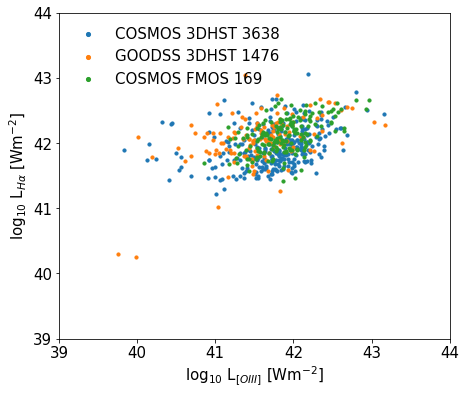

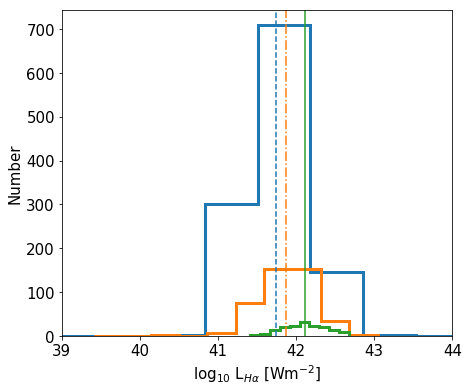

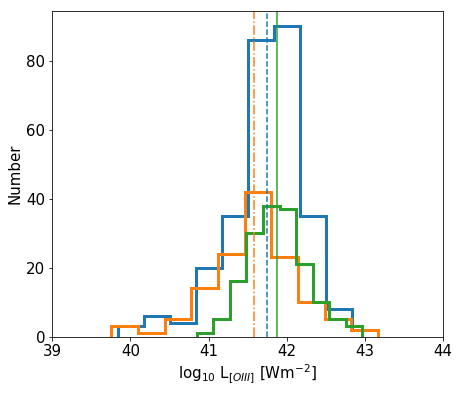

In [87]:
COSMOS_sample_1 = COSMOS_sample[(COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']>0)&\
                              (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)]
GOODSS_sample_1 = GOODSS_sample[(GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']>0)&\
                              (GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)]
COSMOS_FMOS_sample_1 = COSMOS[(COSMOS['line.H-alpha']>0)&\
                              (COSMOS['line.H-alpha']/COSMOS['line.H-alpha_err']>3)]

L_Ha_COSMOS  = flux_to_luminosity(flux=COSMOS_sample_1['line.NII-654.8+line.H-alpha+line.NII-658.4'], z=COSMOS_sample_1['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_Ha_GOODSS  = flux_to_luminosity(flux=GOODSS_sample_1['line.NII-654.8+line.H-alpha+line.NII-658.4'], z=GOODSS_sample_1['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

L_OIII_COSMOS  = flux_to_luminosity(flux=COSMOS_sample_1['line.OIII-500.7'], z=COSMOS_sample_1['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_OIII_GOODSS  = flux_to_luminosity(flux=GOODSS_sample_1['line.OIII-500.7'], z=GOODSS_sample_1['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

L_Ha_COSMOS_FMOS    = flux_to_luminosity(flux=COSMOS_FMOS_sample_1['line.H-alpha'], z=COSMOS_FMOS_sample_1['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_OIII_COSMOS_FMOS  = flux_to_luminosity(flux=COSMOS_FMOS_sample_1['line.OIII-500.7'], z=COSMOS_FMOS_sample_1['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)


plt.figure(figsize=(7,6))
plt.scatter(np.log10(L_OIII_COSMOS),\
            np.log10(L_Ha_COSMOS), s = 10, label = 'COSMOS 3DHST %i'%len(COSMOS_sample))
plt.scatter(np.log10(L_OIII_GOODSS),\
            np.log10(L_Ha_GOODSS), s = 10, label = 'GOODSS 3DHST %i'%len(GOODSS_sample))
plt.scatter(np.log10(L_OIII_COSMOS_FMOS), np.log10(L_Ha_COSMOS_FMOS), s = 10, label = 'COSMOS FMOS %i'%len(COSMOS))
plt.xlim(39, 44)
plt.ylim(39, 44)
plt.xlabel(r'log$_{10}$ L$_{[OIII]}$ [Wm$^{-2}$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ L$_{H\alpha}$ [Wm$^{-2}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

L_Ha_COSMOS_1      = L_Ha_COSMOS[L_Ha_COSMOS>0]
L_Ha_GOODSS_1      = L_Ha_GOODSS[L_Ha_GOODSS>0]
L_Ha_COSMOS_FMOS_1 = L_Ha_COSMOS_FMOS[L_Ha_COSMOS_FMOS>0]

plt.figure(figsize=(7,6))
plt.hist(np.log10(L_Ha_COSMOS_1), histtype = 'step', lw = 3)
plt.hist(np.log10(L_Ha_GOODSS_1), histtype = 'step', lw = 3)
plt.hist(np.log10(L_Ha_COSMOS_FMOS_1), histtype = 'step', lw = 3)
plt.axvline(np.mean(np.log10(L_Ha_COSMOS_1)), ls = '--', c = 'C0')
plt.axvline(np.mean(np.log10(L_Ha_GOODSS_1)), ls = '-.', c = 'C1')
plt.axvline(np.mean(np.log10(L_Ha_COSMOS_FMOS_1)), ls = '-', c = 'C2')
plt.xlim(39, 44)
plt.ylabel(r'Number', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{H\alpha}$ [Wm$^{-2}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

L_OIII_COSMOS_2      = L_OIII_COSMOS[L_OIII_COSMOS>0]
L_OIII_GOODSS_2      = L_OIII_GOODSS[L_OIII_GOODSS>0]
L_OIII_COSMOS_FMOS_2 = L_OIII_COSMOS_FMOS[L_OIII_COSMOS_FMOS>0]

plt.figure(figsize=(7,6))
plt.hist(np.log10(L_OIII_COSMOS_2), histtype = 'step', lw = 3)
plt.hist(np.log10(L_OIII_GOODSS_2), histtype = 'step', lw = 3)
plt.hist(np.log10(L_OIII_COSMOS_FMOS_2), histtype = 'step', lw = 3)
plt.axvline(np.mean(np.log10(L_OIII_COSMOS_2)), ls = '--', c = 'C0')
plt.axvline(np.mean(np.log10(L_OIII_GOODSS_2)), ls = '-.', c = 'C1')
plt.axvline(np.mean(np.log10(L_OIII_COSMOS_FMOS_2)), ls = '-', c = 'C2')
plt.xlim(39, 44)
plt.ylabel(r'Number', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{[OIII]}$ [Wm$^{-2}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
No handles with labels found to put in legend.
No handles with labels found to put in legend.


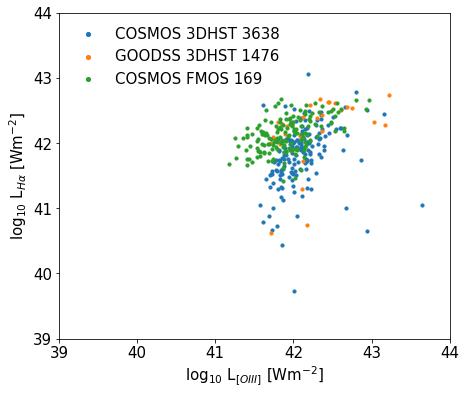

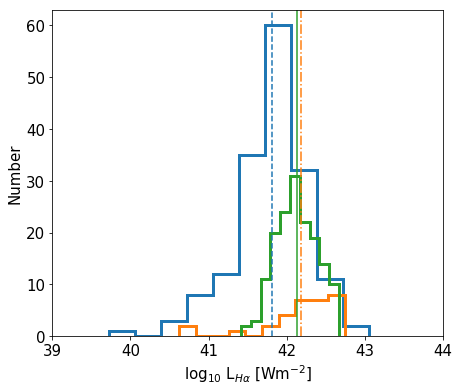

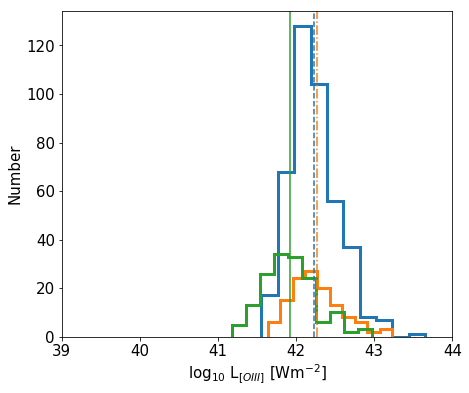

In [88]:
COSMOS_sample_2 = COSMOS_sample[(COSMOS_sample['line.OIII-500.7']>0)&\
                              (COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3)]
GOODSS_sample_2 = GOODSS_sample[(GOODSS_sample['line.OIII-500.7']>0)&\
                              (GOODSS_sample['line.OIII-500.7']/GOODSS_sample['line.OIII-500.7_err']>3)]
COSMOS_FMOS_sample_2 = COSMOS[(COSMOS['line.OIII-500.7']>0)&\
                              (COSMOS['line.OIII-500.7']/COSMOS['line.OIII-500.7_err']>3)]

L_Ha_COSMOS  = flux_to_luminosity(flux=COSMOS_sample_2['line.NII-654.8+line.H-alpha+line.NII-658.4'], z=COSMOS_sample_2['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_Ha_GOODSS  = flux_to_luminosity(flux=GOODSS_sample_2['line.NII-654.8+line.H-alpha+line.NII-658.4'], z=GOODSS_sample_2['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

L_OIII_COSMOS  = flux_to_luminosity(flux=COSMOS_sample_2['line.OIII-500.7'], z=COSMOS_sample_2['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_OIII_GOODSS  = flux_to_luminosity(flux=GOODSS_sample_2['line.OIII-500.7'], z=GOODSS_sample_2['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

L_Ha_COSMOS_FMOS    = flux_to_luminosity(flux=COSMOS_FMOS_sample_2['line.H-alpha'], z=COSMOS_FMOS_sample_2['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)
L_OIII_COSMOS_FMOS  = flux_to_luminosity(flux=COSMOS_FMOS_sample_2['line.OIII-500.7'], z=COSMOS_FMOS_sample_2['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

plt.figure(figsize=(7,6))
plt.scatter(np.log10(L_OIII_COSMOS),\
            np.log10(L_Ha_COSMOS), s = 10, label = 'COSMOS 3DHST %i'%len(COSMOS_sample))
plt.scatter(np.log10(L_OIII_GOODSS),\
            np.log10(L_Ha_GOODSS), s = 10, label = 'GOODSS 3DHST %i'%len(GOODSS_sample))
plt.scatter(np.log10(L_OIII_COSMOS_FMOS), np.log10(L_Ha_COSMOS_FMOS), s = 10, label = 'COSMOS FMOS %i'%len(COSMOS))
plt.xlim(39, 44)
plt.ylim(39, 44)
plt.xlabel(r'log$_{10}$ L$_{[OIII]}$ [Wm$^{-2}$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ L$_{H\alpha}$ [Wm$^{-2}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

L_Ha_COSMOS_1      = L_Ha_COSMOS[L_Ha_COSMOS>0]
L_Ha_GOODSS_1      = L_Ha_GOODSS[L_Ha_GOODSS>0]
L_Ha_COSMOS_FMOS_1 = L_Ha_COSMOS_FMOS[L_Ha_COSMOS_FMOS>0]

plt.figure(figsize=(7,6))
plt.hist(np.log10(L_Ha_COSMOS_1), histtype = 'step', lw = 3)
plt.hist(np.log10(L_Ha_GOODSS_1), histtype = 'step', lw = 3)
plt.hist(np.log10(L_Ha_COSMOS_FMOS_1), histtype = 'step', lw = 3)
plt.axvline(np.mean(np.log10(L_Ha_COSMOS_1)), ls = '--', c = 'C0')
plt.axvline(np.mean(np.log10(L_Ha_GOODSS_1)), ls = '-.', c = 'C1')
plt.axvline(np.mean(np.log10(L_Ha_COSMOS_FMOS_1)), ls = '-', c = 'C2')
plt.xlim(39, 44)
plt.ylabel(r'Number', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{H\alpha}$ [Wm$^{-2}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

L_OIII_COSMOS_2      = L_OIII_COSMOS[L_OIII_COSMOS>0]
L_OIII_GOODSS_2      = L_OIII_GOODSS[L_OIII_GOODSS>0]
L_OIII_COSMOS_FMOS_2 = L_OIII_COSMOS_FMOS[L_OIII_COSMOS_FMOS>0]

plt.figure(figsize=(7,6))
plt.hist(np.log10(L_OIII_COSMOS_2), histtype = 'step', lw = 3)
plt.hist(np.log10(L_OIII_GOODSS_2), histtype = 'step', lw = 3)
plt.hist(np.log10(L_OIII_COSMOS_FMOS_2), histtype = 'step', lw = 3)
plt.axvline(np.mean(np.log10(L_OIII_COSMOS_2)), ls = '--', c = 'C0')
plt.axvline(np.mean(np.log10(L_OIII_GOODSS_2)), ls = '-.', c = 'C1')
plt.axvline(np.mean(np.log10(L_OIII_COSMOS_FMOS_2)), ls = '-', c = 'C2')
plt.xlim(39, 44)
plt.ylabel(r'Number', fontsize = 15)
plt.xlabel(r'log$_{10}$ L$_{[OIII]}$ [Wm$^{-2}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

# SFRs and Stellar mass comparison

/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


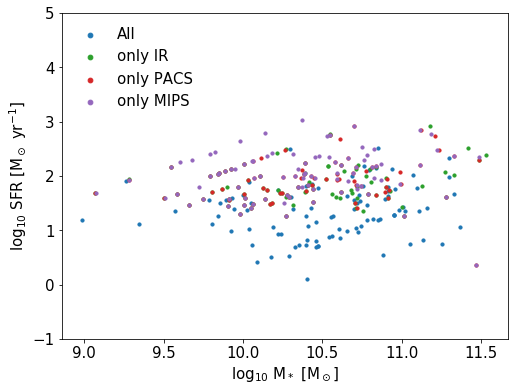

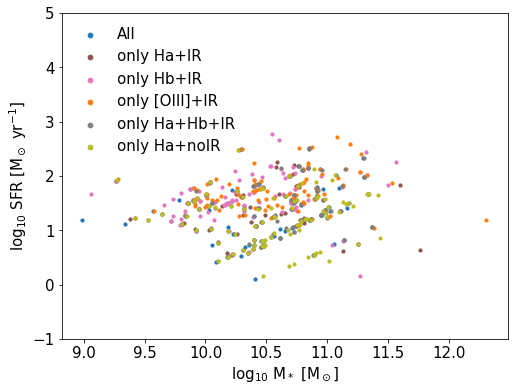

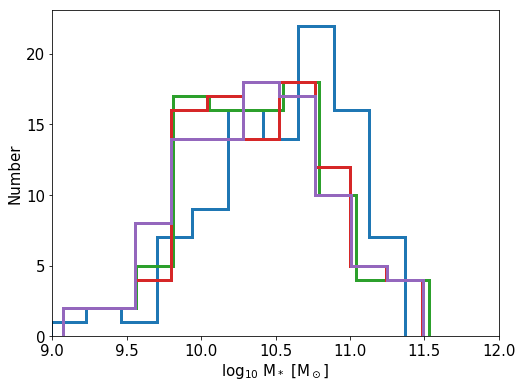

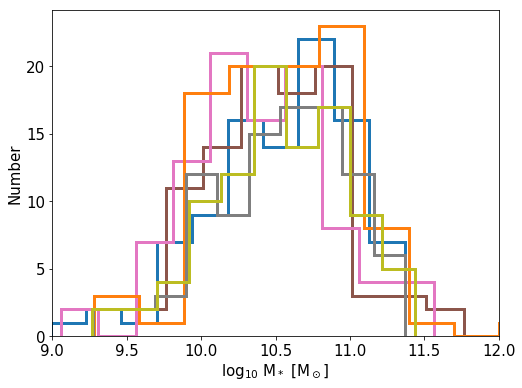

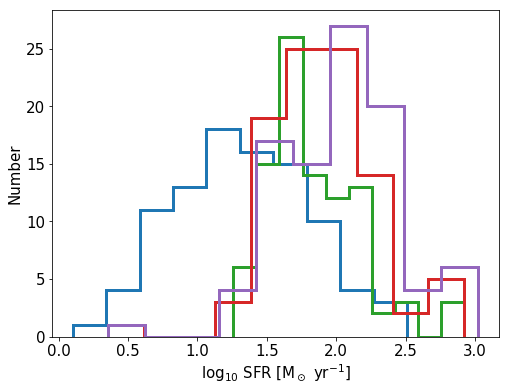

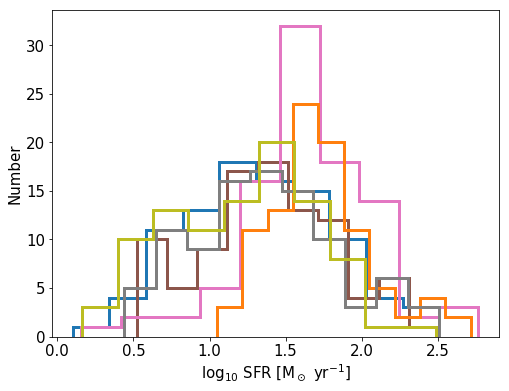

In [91]:
plt.figure(figsize=(8,6))
# plt.scatter(np.log10(COSMOS_cigale_good_5['best.stellar.m_star']), np.log10(COSMOS_cigale_good_5['best.sfh.sfr']), s = 10)
plt.scatter(np.log10(COSMOS_cigale_good_6['best.stellar.m_star']), np.log10(COSMOS_cigale_good_6['best.sfh.sfr']),\
            s = 10, c = 'C0', label = 'All')
plt.scatter(np.log10(COSMOS_cigale_good_8['best.stellar.m_star']), np.log10(COSMOS_cigale_good_8['best.sfh.sfr']),\
            s = 10, c = 'C2', label = 'only IR')
plt.scatter(np.log10(COSMOS_cigale_good_9['best.stellar.m_star']), np.log10(COSMOS_cigale_good_9['best.sfh.sfr']),\
            s = 10, c = 'C3', label = 'only PACS')
plt.scatter(np.log10(COSMOS_cigale_good_10['best.stellar.m_star']), np.log10(COSMOS_cigale_good_10['best.sfh.sfr']),\
            s = 10, c = 'C4', label = 'only MIPS')
# plt.scatter(np.log10(COSMOS_starburst_results_1['best.stellar.m_star']), np.log10(COSMOS_starburst_results_1['best.sfh.sfr']), s = 10)
# plt.scatter(np.log10(COSMOS_CF00_results_1['best.stellar.m_star']), np.log10(COSMOS_CF00_results_1['best.sfh.sfr']), s = 0.2)
plt.ylim(-1, 5)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper left');

plt.figure(figsize=(8,6))
# plt.scatter(np.log10(COSMOS_cigale_good_5['best.stellar.m_star']), np.log10(COSMOS_cigale_good_5['best.sfh.sfr']), s = 10)
plt.scatter(np.log10(COSMOS_cigale_good_6['best.stellar.m_star']), np.log10(COSMOS_cigale_good_6['best.sfh.sfr']),\
            s = 10, c = 'C0', label = 'All')
plt.scatter(np.log10(COSMOS_cigale_good_11['best.stellar.m_star']), np.log10(COSMOS_cigale_good_11['best.sfh.sfr']),\
            s = 10, c = 'C5', label = 'only Ha+IR')
plt.scatter(np.log10(COSMOS_cigale_good_12['best.stellar.m_star']), np.log10(COSMOS_cigale_good_12['best.sfh.sfr']),\
            s = 10, c = 'C6', label = 'only Hb+IR')
plt.scatter(np.log10(COSMOS_cigale_good_7['best.stellar.m_star']), np.log10(COSMOS_cigale_good_7['best.sfh.sfr']),\
            s = 10, c = 'C1', label = 'only [OIII]+IR')
plt.scatter(np.log10(COSMOS_cigale_good_13['best.stellar.m_star']), np.log10(COSMOS_cigale_good_13['best.sfh.sfr']),\
            s = 10, c = 'C7', label = 'only Ha+Hb+IR')
plt.scatter(np.log10(COSMOS_cigale_good_14['best.stellar.m_star']), np.log10(COSMOS_cigale_good_14['best.sfh.sfr']),\
            s = 10, c = 'C8', label = 'only Ha+noIR')
# plt.scatter(np.log10(COSMOS_starburst_results_1['best.stellar.m_star']), np.log10(COSMOS_starburst_results_1['best.sfh.sfr']), s = 10)
# plt.scatter(np.log10(COSMOS_CF00_results_1['best.stellar.m_star']), np.log10(COSMOS_CF00_results_1['best.sfh.sfr']), s = 0.2)
plt.ylim(-1, 5)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper left');

plt.figure(figsize=(8,6))
plt.hist(np.log10(COSMOS_cigale_good_6['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C0')
plt.hist(np.log10(COSMOS_cigale_good_8[COSMOS_cigale_good_8['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C2')
plt.hist(np.log10(COSMOS_cigale_good_9[COSMOS_cigale_good_9['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C3')
plt.hist(np.log10(COSMOS_cigale_good_10[COSMOS_cigale_good_10['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C4')
plt.xlim(9, 12)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.ylabel(r'Number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.figure(figsize=(8,6))
plt.hist(np.log10(COSMOS_cigale_good_6['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C0')
plt.hist(np.log10(COSMOS_cigale_good_11[COSMOS_cigale_good_11['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C5')
plt.hist(np.log10(COSMOS_cigale_good_12[COSMOS_cigale_good_12['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C6')
plt.hist(np.log10(COSMOS_cigale_good_7['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C1')
plt.hist(np.log10(COSMOS_cigale_good_13[COSMOS_cigale_good_13['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C7')
plt.hist(np.log10(COSMOS_cigale_good_14[COSMOS_cigale_good_14['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C8')
plt.xlim(9, 12)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.ylabel(r'Number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.figure(figsize=(8,6))
plt.hist(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), histtype = 'step',\
         lw = 3, color = 'C0')
plt.hist(np.log10(COSMOS_cigale_good_8[COSMOS_cigale_good_8['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C2')
plt.hist(np.log10(COSMOS_cigale_good_9[COSMOS_cigale_good_9['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C3')
plt.hist(np.log10(COSMOS_cigale_good_10[COSMOS_cigale_good_10['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C4')
plt.xlabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.ylabel(r'Number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.figure(figsize=(8,6))
plt.hist(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), histtype = 'step',\
         lw = 3, color = 'C0')
plt.hist(np.log10(COSMOS_cigale_good_11[COSMOS_cigale_good_11['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C5')
plt.hist(np.log10(COSMOS_cigale_good_12[COSMOS_cigale_good_12['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C6')
plt.hist(np.log10(COSMOS_cigale_good_7['best.sfh.sfr']), histtype = 'step',\
         lw = 3, color = 'C1')
plt.hist(np.log10(COSMOS_cigale_good_13[COSMOS_cigale_good_13['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C7')
plt.hist(np.log10(COSMOS_cigale_good_14[COSMOS_cigale_good_14['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C8')
# plt.hist(np.log10(COSMOS_cigale_good_1[COSMOS_cigale_good_1['best.sfh.sfr']>0]['best.sfh.sfr']),\
#          histtype = 'step', lw = 3, color = 'k')
plt.xlabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.ylabel(r'Number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

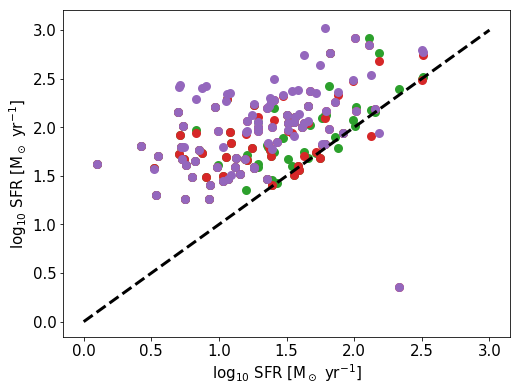

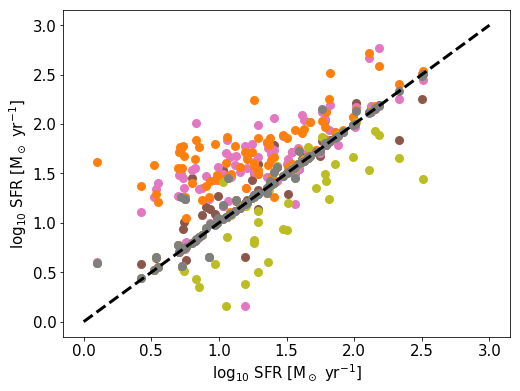

In [92]:
X = np.linspace(0, 3, 100)

plt.figure(figsize=(8,6))
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_8['best.sfh.sfr']),\
         lw = 3, color = 'C2')
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_9['best.sfh.sfr']),\
         lw = 3, color = 'C3')
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_10['best.sfh.sfr']),\
         lw = 3, color = 'C4')
plt.plot(X, X, lw = 3, ls = '--', c = 'k')
plt.xlabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.figure(figsize=(8,6))
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_11['best.sfh.sfr']),\
         lw = 3, color = 'C5')
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_12['best.sfh.sfr']),\
         lw = 3, color = 'C6')
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_7['best.sfh.sfr']),\
         lw = 3, color = 'C1')

plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_14['best.sfh.sfr']),\
         lw = 3, color = 'C8')
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_13['best.sfh.sfr']),\
         lw = 3, color = 'C7')
# plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_1['best.sfh.sfr']),\
#          lw = 3, color = 'k')
plt.plot(X, X, lw = 3, ls = '--', c = 'k')
plt.xlabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

# Checking logU and metallicity

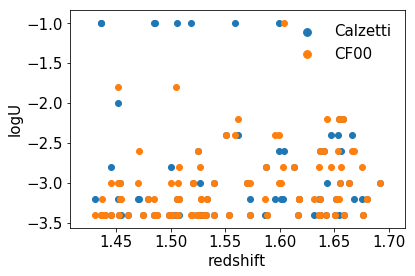

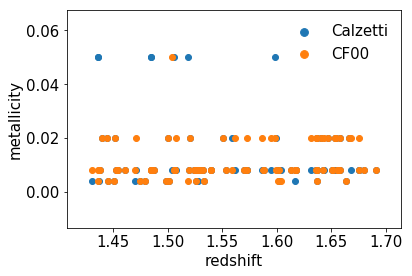

In [102]:
plt.figure()
plt.scatter(good_data['redshift'], COSMOS_cigale_good_1['best.nebular.logU'], label = 'Calzetti')
plt.scatter(good_data['redshift'], COSMOS_cigale_good_3['best.nebular.logU'], label = 'CF00')
plt.xlabel(r'redshift', fontsize = 15)
plt.ylabel(r'logU', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper right')

plt.figure()
plt.scatter(good_data['redshift'], COSMOS_cigale_good_1['best.stellar.metallicity'], label = 'Calzetti')
plt.scatter(good_data['redshift'], COSMOS_cigale_good_3['best.stellar.metallicity'], label = 'CF00')
plt.xlabel(r'redshift', fontsize = 15)
plt.ylabel(r'metallicity', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper right')

# Checking equivalent widths for the FMOS sample

In [175]:
FMOS_data_EWs = Table.read('/data/3DHST_Data/FMOS_COSMOS_sample/fmos-cosmos_catalog_2019.fits', format = 'fits')

In [176]:
FMOS_data_EWs.rename_column('FMOS_ID', 'id')

FMOS_data_EWs = FMOS_data_EWs.to_pandas()
good_data_EWs = good_data.to_pandas()

FMOS_EWs_sample = pd.merge(good_data_EWs, FMOS_data_EWs, how ='left', on='id')

FMOS_data_EWs   = Table.from_pandas(FMOS_data_EWs)
good_data_EWs   = Table.from_pandas(good_data_EWs)
FMOS_EWs_sample = Table.from_pandas(FMOS_EWs_sample)

(array([ 2.,  3.,  2., 15., 22., 25., 18.,  5.,  2.,  1.]),
 array([1.79945777, 1.91482753, 2.03019728, 2.14556704, 2.2609368 ,
        2.37630656, 2.49167632, 2.60704608, 2.72241584, 2.8377856 ,
        2.95315536]),
 <a list of 1 Patch objects>)

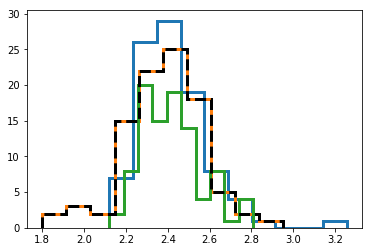

In [191]:
plt.hist(np.log10(FMOS_EWs_sample['FWHMV_OBS_HALPHA']), histtype = 'step',\
         lw = 3, color = 'C0')
plt.hist(np.log10(FMOS_EWs_sample['FWHMV_OBS_HBETA']), histtype = 'step',\
         lw = 3, color = 'C1')
plt.hist(np.log10(FMOS_EWs_sample['FWHMV_OBS_NII6584']), histtype = 'step',\
         lw = 3, color = 'C2')
plt.hist(np.log10(FMOS_EWs_sample['FWHMV_OBS_OIII5007']), histtype = 'step',\
         lw = 3, ls = '--', color = 'k')

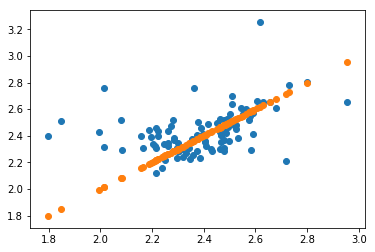

In [196]:
plt.scatter(np.log10(FMOS_EWs_sample['FWHMV_OBS_OIII5007']), np.log10(FMOS_EWs_sample['FWHMV_OBS_HALPHA']))
plt.scatter(np.log10(FMOS_EWs_sample['FWHMV_OBS_OIII5007']), np.log10(FMOS_EWs_sample['FWHMV_OBS_HBETA']))
# plt.scatter(np.log10(FMOS_EWs_sample['FWHMV_OBS_OIII5007']), np.log10(FMOS_EWs_sample['FWHMV_OBS_NII6584']))

In [200]:
c = 3e5 # In km/s

def vel_to_width(vel, L, c):
    return (vel*L/c)

(array([ 8., 33., 29., 16.,  5.,  2.,  1.,  0.,  0.,  1.]),
 array([ 1.05175383,  2.44492301,  3.83809219,  5.23126137,  6.62443054,
         8.01759972,  9.4107689 , 10.80393808, 12.19710726, 13.59027644,
        14.98344562]),
 <a list of 1 Patch objects>)

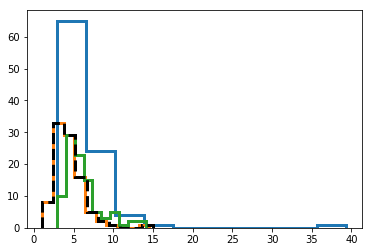

In [203]:
plt.hist(vel_to_width(FMOS_EWs_sample['FWHMV_OBS_HALPHA'], 6563.0, c), histtype = 'step',\
         lw = 3, color = 'C0')
plt.hist(vel_to_width(FMOS_EWs_sample['FWHMV_OBS_HBETA'], 4861.0, c), histtype = 'step',\
         lw = 3, color = 'C1')
plt.hist(vel_to_width(FMOS_EWs_sample['FWHMV_OBS_NII6584'], 6584.0, c), histtype = 'step',\
         lw = 3, color = 'C2')
plt.hist(vel_to_width(FMOS_EWs_sample['FWHMV_OBS_OIII5007'], 5007.0, c), histtype = 'step',\
         lw = 3, ls = '--', color = 'k')

In [213]:
from astropy.io import fits

In [299]:
FMOS_data_EWs = Table.read('/data/3DHST_Data/FMOS_COSMOS_sample/fmos-cosmos_catalog_2019.fits', format = 'fits')

In [300]:
FMOS_data_EWs.rename_column('FMOS_ID', 'id')

FMOS_data_EWs = FMOS_data_EWs.to_pandas()
bad_data_EWs = bad_data.to_pandas()

FMOS_EWs_sample = pd.merge(bad_data_EWs, FMOS_data_EWs, how ='left', on='id')

FMOS_data_EWs   = Table.from_pandas(FMOS_data_EWs)
bad_data_EWs   = Table.from_pandas(bad_data_EWs)
FMOS_EWs_sample_bad = Table.from_pandas(FMOS_EWs_sample)

In [335]:
# FMOS_EWs_sample_bad[FMOS_EWs_sample_bad['id'] == 'FMOS_J100008.1+022529']
FMOS_EWs_sample_bad[FMOS_EWs_sample_bad['id'] == 'FMOS_J095949.5+022558']

id,redshift,galex.NUV,galex.NUV_err,cfht.megacam.u,cfht.megacam.u_err,subaru.suprime.B,subaru.suprime.B_err,subaru.suprime.V,subaru.suprime.V_err,subaru.suprime.r,subaru.suprime.r_err,subaru.suprime.i,subaru.suprime.i_err,subaru.suprime.z,subaru.suprime.z_err,subaru.hsc.y,subaru.hsc.y_err,UKIRT_WFCJ,UKIRT_WFCJ_err,cfht.wircam.H,cfht.wircam.H_err,WFCAM_K,WFCAM_K_err,IRAC1,IRAC1_err,IRAC2,IRAC2_err,IRAC3,IRAC3_err,IRAC4,IRAC4_err,spitzer.mips.24,spitzer.mips.24_err,herschel.pacs.100,herschel.pacs.100_err,herschel.pacs.160,herschel.pacs.160_err,herschel.spire.PSW,herschel.spire.PSW_err,herschel.spire.PMW,herschel.spire.PMW_err,herschel.spire.PLW,herschel.spire.PLW_err,line.H-alpha,line.H-alpha_err,line.H-beta,line.H-beta_err,line.NII-658.4,line.NII-658.4_err,line.OIII-500.7,line.OIII-500.7_err,INDEX,RA,DEC,ZBEST,ZFLAG,OBS_DATE_HL,OBS_DATE_HS,OBS_DATE_JL,SLITID_HL,SLITID_HS,SLITID_JL,SEEING_HL,SEEING_HS,SEEING_JL,GRATING_L1,GRATING_L2,FLUX_HALPHA,FLUX_ERR_HALPHA,FWHMV_OBS_HALPHA,FWHMV_ERR_HALPHA,LOSS_BADPIX_HALPHA,FLUX_NII6584,FLUX_ERR_NII6584,FWHMV_OBS_NII6584,FWHMV_ERR_NII6584,LOSS_BADPIX_NII,FLUX_HBETA,FLUX_ERR_HBETA,FWHMV_OBS_HBETA,FWHMV_ERR_HBETA,LOSS_BADPIX_HBETA,FLUX_OIII5007,FLUX_ERR_OIII5007,FWHMV_OBS_OIII5007,FWHMV_ERR_OIII5007,LOSS_BADPIX_OIII,FIT_MODEL_L1,FIT_MODEL_L2,APERCORR_BEST_L1,APERCORR_BEST_L2,FLAG_APERCORR_L1,FLAG_APERCORR_L2,ID_COSMOS2015,ID_CHANDRA2016
bytes21,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float32,int16,int32,int32,int32,int16,int16,int16,float32,float32,float32,bytes2,bytes2,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,int16,int16,float32,float32,int16,int16,int32,bytes9
FMOS_J095949.5+022558,1.6747681,2.2637072e-05,5.5867164e-05,0.0007241090926519218,4.1063101694146136e-05,0.0008124499523015625,3.6900985561277184e-05,0.0009243605810253221,4.7072532941763724e-05,0.0010043983086553594,4.362855007019031e-05,0.0013646860905079316,4.7114291395670265e-05,0.0015368950204737923,5.8381684735588484e-05,0.002134496460730599,0.00021678117820081013,0.0034192271800860524,0.00015789094452259427,0.004724266400202605,0.0002298777207641414,0.005475488670139947,0.000337000748713796,0.0084139565,7.567686e-05,0.010167589,0.00012682559,0.009519873,0.0030812058,0.0,0.0038170314,0.09368102,0.004062134,0.26321029872633517,0.4145198909100145,2.9518594965338707,4.426195751875639,1.552568,1.1629083,1.2815089,1.4840275,2.3177068,2.9426796,8.81125773425935e-20,6.000397454351119e-21,3.3694695728238443e-20,5.24043593619381e-21,2.2289093343827948e-20,3.8233258533451215e-21,7.420257948258545e-21,3.819462718402772e-21,341,149.956416666667,2.43269444444444,1.6747681,4,20120314,-99,20120319,126,-99,130,0.8,--,0.9,hl,jl,8.81125773425935e-17,6.000397454351119e-18,243.41602590596526,19.52771840662222,0.12306501,2.2289093343827948e-17,3.8233258533451216e-18,243.41603463441123,19.527718406622224,0.041875944,3.369469572823844e-17,5.2404359361938096e-18,166.3579717780682,29.26533662397246,0.0015195352,7.420257948258545e-18,3.8194627184027716e-18,166.35797774335566,29.265336623972455,3.807789e-19,0,0,1.6693441,1.833173,0,0,746986,NONE


In [396]:
# adjust the path and name of the spectrum file.
# file = input('Path and name of the fits-file: ')
 
#   Header-Check Spectrum
sp = fits.open('/data/3DHST_Data/FMOS_COSMOS_sample/FMOS_Spectra/1dspec/FMOS_J095949.5+022558_20120314_hl_1d.fits')

print('\n\nHeader of the spectrum :\n\n', sp[0].header, '\n\n')
 
# Generation of arrays with the wavelengths and fluxes of the spectrum
flux = np.array(sp[0].data)
wave = np.ones(sp[0].header['NAXIS1'], dtype=float)
for i in range(sp[0].header['NAXIS1']):
    wave[i] = sp[0].header['CRVAL1'] + i*sp[0].header['CD1_1']
# The list wave contains the wavelengths of the pixels.
# In the list flux the corresponding intensities.
 
#   Close the fits-file
sp.close()




Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    1 / number of data axes                            NAXIS1  =                 1920 / length of data axis 1                          NAXIS2  =                    1 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H CTYPE1  = 'WAVELENGTH'                                                          CUNIT1  = 'Angstrom'                                                            CRPIX1  =                   1.                                                  CRVAL1  =               15600.                                                  CD1_1   =  

In [400]:
# adjust the path and name of the spectrum file.
# file = input('Path and name of the fits-file: ')
 
#   Header-Check Spectrum
sp_0 = fits.open('/data/3DHST_Data/FMOS_COSMOS_sample/FMOS_Spectra/1dspec/FMOS_J095949.5+022558_20120319_jl_1d.fits')

print('\n\nHeader of the spectrum :\n\n', sp_0[0].header, '\n\n')
 
# Generation of arrays with the wavelengths and fluxes of the spectrum
flux_0 = np.array(sp_0[0].data)
wave_0 = np.ones(sp_0[0].header['NAXIS1'], dtype=float)
for i in range(sp_0[0].header['NAXIS1']):
    wave_0[i] = sp_0[0].header['CRVAL1'] + i*sp_0[0].header['CD2_2']
# The list wave contains the wavelengths of the pixels.
# In the list flux the corresponding intensities.
 
#   Close the fits-file
sp_0.close()



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    1 / number of data axes                            NAXIS1  =                 1920 / length of data axis 1                          NAXIS2  =                    1 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H CTYPE1  = 'WAVELENGTH'                                                          CUNIT1  = 'Angstrom'                                                            CRPIX1  =                   1.                                                  CRVAL1  =               11230.                                                  CD1_1   =  

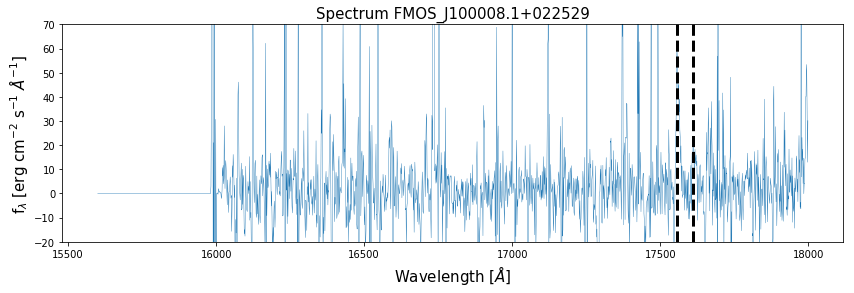

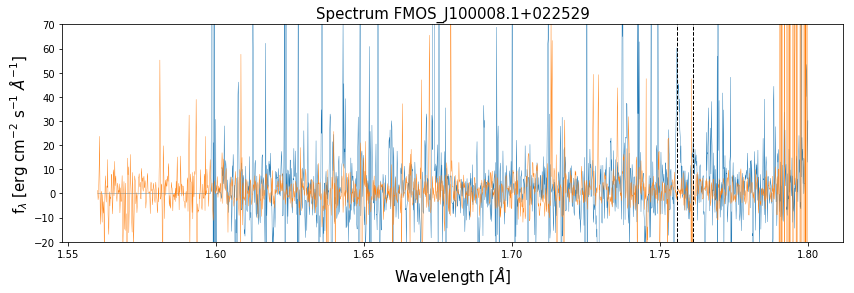

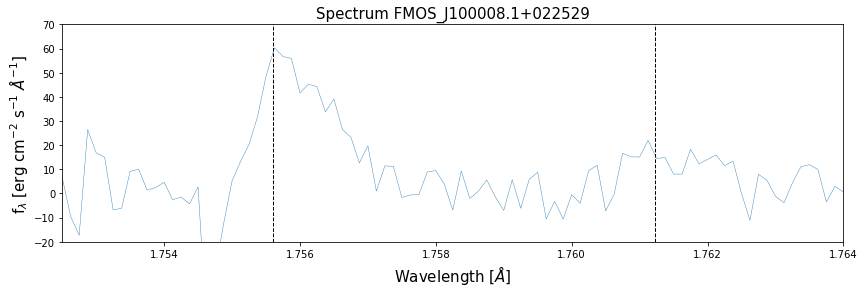

In [401]:
# Plot the spectrum
plt.figure(figsize=(14, 4))
# plt.plot(wave, flux)
# plt.plot(wave/(1.0+1.675), flux_0, lw = 0.4)
plt.plot(wave/(1.0), flux, lw = 0.4)
plt.xlabel('Wavelength [Angström]', fontsize = 15)
plt.ylabel('ADU', fontsize = 15)
plt.title('Spectrum '+'FMOS_J100008.1+022529', fontsize = 15)
# plt.xlim(17400, 17600)
# plt.xlim(6500, 6600)
plt.ylim(-20, 70)
plt.axvline(6563.0*(1.0+1.675), ls = '--', lw = 3, c = 'k')
# plt.axvline(4861.0*(1.0+1.675), ls = '--', lw = 3, c = 'k')
plt.axvline(6584.0*(1.0+1.675), ls = '--', lw = 3, c = 'k')
# plt.axvline(5007.1*(1.0+1.675), ls = '--', lw = 3, c = 'k')
# plt.axvline(6563.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(4861.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(6584.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(5007.1, ls = '--', lw = 3, c = 'k')
# plt.yscale('log')
plt.xlabel('Wavelength [$\AA$]', fontsize = 15)
plt.ylabel(r'f$_\lambda$ [erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]', fontsize = 15);
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'lower left')
# Showing the plot when the script is running in a normal Python console
# is performed. This is not necessary for the IPython console in Spyder.
# plt.show()

# Plot the spectrum
plt.figure(figsize=(14, 4))
# plt.plot(wave, flux)
# plt.plot(wave/(1.0+1.675), flux_0, lw = 0.4)
plt.plot(wave/(1e4), flux, lw = 0.4)
plt.plot(wave/(1e4), flux_0, lw = 0.4)
plt.xlabel('Wavelength [Angström]', fontsize = 15)
plt.ylabel('ADU', fontsize = 15)
plt.title('Spectrum '+'FMOS_J100008.1+022529', fontsize = 15)
# plt.xlim(1.6, 1.8)
# plt.xlim(6500, 6600)
plt.ylim(-20, 70)
plt.axvline(0.6563*(1.0+1.675), ls = '--', lw = 1, c = 'k')
# plt.axvline(4861.0*(1.0+1.675), ls = '--', lw = 3, c = 'k')
plt.axvline(0.6584*(1.0+1.675), ls = '--', lw = 1, c = 'k')
# plt.axvline(5007.1*(1.0+1.675), ls = '--', lw = 3, c = 'k')
# plt.axvline(6563.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(4861.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(6584.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(5007.1, ls = '--', lw = 3, c = 'k')
# plt.yscale('log')
plt.xlabel('Wavelength [$\AA$]', fontsize = 15)
plt.ylabel(r'f$_\lambda$ [erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]', fontsize = 15);
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'lower left')
# Showing the plot when the script is running in a normal Python console
# is performed. This is not necessary for the IPython console in Spyder.
# plt.show()

# Plot the spectrum
plt.figure(figsize=(14, 4))
# plt.plot(wave, flux)
# plt.plot(wave/(1.0+1.675), flux_0, lw = 0.4)
plt.plot(wave/(1e4), flux, lw = 0.4)
# plt.plot(wave/(1e4), flux_0, lw = 0.4)
plt.xlabel('Wavelength [Angström]', fontsize = 15)
plt.ylabel('ADU', fontsize = 15)
plt.title('Spectrum '+'FMOS_J100008.1+022529', fontsize = 15)
plt.xlim(1.7525, 1.764)
# plt.xlim(6500, 6600)
plt.ylim(-20, 70)
plt.axvline(0.6563*(1.0+1.675), ls = '--', lw = 1, c = 'k')
# plt.axvline(4861.0*(1.0+1.675), ls = '--', lw = 3, c = 'k')
plt.axvline(0.6584*(1.0+1.675), ls = '--', lw = 1, c = 'k')
# plt.axvline(5007.1*(1.0+1.675), ls = '--', lw = 3, c = 'k')
# plt.axvline(6563.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(4861.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(6584.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(5007.1, ls = '--', lw = 3, c = 'k')
# plt.yscale('log')
plt.xlabel('Wavelength [$\AA$]', fontsize = 15)
plt.ylabel(r'f$_\lambda$ [erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]', fontsize = 15);
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'lower left')
# Showing the plot when the script is running in a normal Python console
# is performed. This is not necessary for the IPython console in Spyder.
# plt.show()

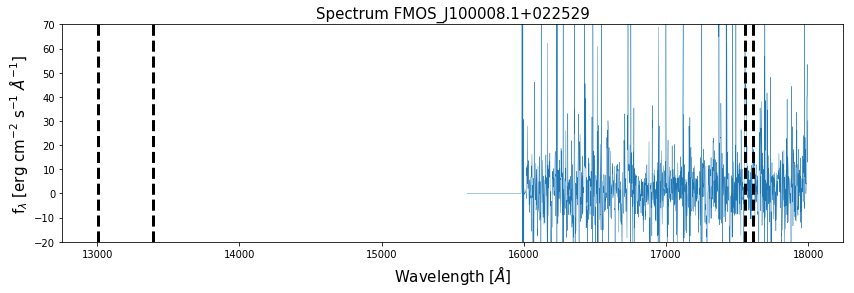

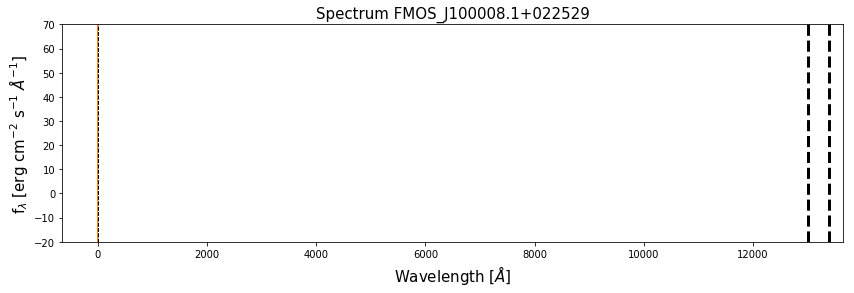

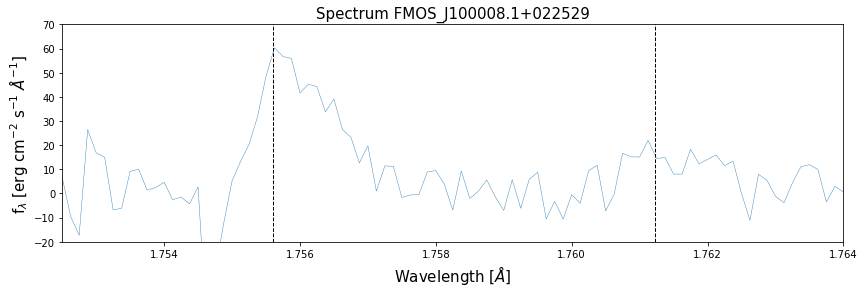

In [402]:
# Plot the spectrum
plt.figure(figsize=(14, 4))
# plt.plot(wave, flux)
# plt.plot(wave/(1.0+1.675), flux_0, lw = 0.4)
plt.plot(wave/(1.0), flux, lw = 0.4)
plt.xlabel('Wavelength [Angström]', fontsize = 15)
plt.ylabel('ADU', fontsize = 15)
plt.title('Spectrum '+'FMOS_J100008.1+022529', fontsize = 15)
# plt.xlim(17400, 17600)
# plt.xlim(6500, 6600)
plt.ylim(-20, 70)
plt.axvline(6563.0*(1.0+1.675), ls = '--', lw = 3, c = 'k')
plt.axvline(4861.0*(1.0+1.675), ls = '--', lw = 3, c = 'k')
plt.axvline(6584.0*(1.0+1.675), ls = '--', lw = 3, c = 'k')
plt.axvline(5007.1*(1.0+1.675), ls = '--', lw = 3, c = 'k')
# plt.axvline(6563.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(4861.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(6584.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(5007.1, ls = '--', lw = 3, c = 'k')
# plt.yscale('log')
plt.xlabel('Wavelength [$\AA$]', fontsize = 15)
plt.ylabel(r'f$_\lambda$ [erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]', fontsize = 15);
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'lower left')
# Showing the plot when the script is running in a normal Python console
# is performed. This is not necessary for the IPython console in Spyder.
# plt.show()

# Plot the spectrum
plt.figure(figsize=(14, 4))
# plt.plot(wave, flux)
# plt.plot(wave/(1.0+1.675), flux_0, lw = 0.4)
plt.plot(wave/(1e4), flux, lw = 0.4)
plt.plot(wave_0/(1e4), flux_0, lw = 0.4)
plt.xlabel('Wavelength [Angström]', fontsize = 15)
plt.ylabel('ADU', fontsize = 15)
plt.title('Spectrum '+'FMOS_J100008.1+022529', fontsize = 15)
# plt.xlim(1.6, 1.8)
# plt.xlim(6500, 6600)
plt.ylim(-20, 70)
plt.axvline(0.6563*(1.0+1.675), ls = '--', lw = 1, c = 'k')
plt.axvline(4861.0*(1.0+1.675), ls = '--', lw = 3, c = 'k')
plt.axvline(0.6584*(1.0+1.675), ls = '--', lw = 1, c = 'k')
plt.axvline(5007.1*(1.0+1.675), ls = '--', lw = 3, c = 'k')
# plt.axvline(6563.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(4861.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(6584.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(5007.1, ls = '--', lw = 3, c = 'k')
# plt.yscale('log')
plt.xlabel('Wavelength [$\AA$]', fontsize = 15)
plt.ylabel(r'f$_\lambda$ [erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]', fontsize = 15);
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'lower left')
# Showing the plot when the script is running in a normal Python console
# is performed. This is not necessary for the IPython console in Spyder.
# plt.show()

# Plot the spectrum
plt.figure(figsize=(14, 4))
# plt.plot(wave, flux)
# plt.plot(wave/(1.0+1.675), flux_0, lw = 0.4)
plt.plot(wave/(1e4), flux, lw = 0.4)
# plt.plot(wave/(1e4), flux_0, lw = 0.4)
plt.xlabel('Wavelength [Angström]', fontsize = 15)
plt.ylabel('ADU', fontsize = 15)
plt.title('Spectrum '+'FMOS_J100008.1+022529', fontsize = 15)
plt.xlim(1.7525, 1.764)
# plt.xlim(6500, 6600)
plt.ylim(-20, 70)
plt.axvline(0.6563*(1.0+1.675), ls = '--', lw = 1, c = 'k')
# plt.axvline(4861.0*(1.0+1.675), ls = '--', lw = 3, c = 'k')
plt.axvline(0.6584*(1.0+1.675), ls = '--', lw = 1, c = 'k')
# plt.axvline(5007.1*(1.0+1.675), ls = '--', lw = 3, c = 'k')
# plt.axvline(6563.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(4861.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(6584.0, ls = '--', lw = 3, c = 'k')
# plt.axvline(5007.1, ls = '--', lw = 3, c = 'k')
# plt.yscale('log')
plt.xlabel('Wavelength [$\AA$]', fontsize = 15)
plt.ylabel(r'f$_\lambda$ [erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]', fontsize = 15);
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'lower left')
# Showing the plot when the script is running in a normal Python console
# is performed. This is not necessary for the IPython console in Spyder.
# plt.show()